### <img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-395/477 Redes Neuronales Artificiales - 2019-2 </h1>

<H3 align='center'> Tarea 2  </H3>
<hr style="height:2px;border:none"/>

**Temas**  
* Manipulaciones en pandas y numpy, preprocesamientos
* Recurrent Neural Networks 
* LSTM, GRU
* Autoencoders
* GAN
 


**Formalidades**  
* Equipos de trabajo de 2 personas (*Ambos estudiantes deben estar preparados para presentar la tarea el día de la entrega*).
* El entregable debe ser un _Jupyter Notebook_ incluyendo los códigos utilizados, los resultados, los gráficos realizados y comentarios. Debe seguir una estructura similar a un informe (se debe introducir los problemas a trabajar, presentar los resultados y discutirlos), se penalizará fuertemente ausencia de comentarios, explicaciones de gráficos, _etc_. Si lo prefiere puede entregar un _Jupyter Notebook_ por pregunta o uno por toda la tarea, con tal de que todos los entregables esten bien identificados y se encuentren en el mismo repositorio de _Github_.
* Se debe preparar una presentación del trabajo realizado y sus hallazgos. El presentador será elegido aleatoriamente y deberá apoyarse en el _Jupyter Notebook_ que entregarán. 
* Formato de entrega: envı́o de link del repositorio en _Github_, al correo electrónico del ayudante (<alvaro.valderrama.13@sansano.usm.cl>), en copia al profesor (<cvalle@inf.utfsm.cl>).   Especificar el siguiente asunto: [INF-395/477-2019 Tarea 2]. Invitar como colaborador al usuario de github "avalderr" para poder acceder al repositorio en caso de ser privado.
* Fecha de entrega y presentaciones: 21 de Febrero 2020 (Fase I). Hora límite de entrega: 23:59. Cualquier _commit_ luego de la hora límite no será evaluado. Se realizará descuento por atrasos en envío del mail igualmente.  

<hr style="height:2px;border:none"/>

La tarea se divide en tres partes:

* 1 - Redes Recurrentes en Texto
* 2 - Autoencoders en Fashion MNIST    
* 3 - GAN para MNIST.

La tarea tiene ejemplos de códigos con los cuales pueden guiarse en gran parte, sin embargo, solo son guias y pueden ser creativos al momento de resolver la tarea. Soluciones creativas o elegantes serán valoradas. También en algunas ocaciones se hacen elecciones arbitrarias, ustedes pueden realizar otras elecciones con tal de que haya una pequeña justificación de por qué su elección es mejor o equivalente.
Recuerden intercalar su código con *comentarios* en celdas _Markdown_, con los comentarios de la pregunta y con cualquier analisis, fórmula (en $ \LaTeX $) o explicación que les parezca relevante para justificar sus procedimientos. *No respondan las preguntas en comentarios en el código*.
Noten que en general cuando se les pide elegir algo o proponer algo no se evaluará tanto la elección en si. En cambio la argumentación detrás de la elección será lo más ponderado.
Si algun modelo se demora demasiado en correr en su maquina, no olvide que puede correr _Jupyter Notebooks_ en _Collab_ de Google, incluso con la opción de aceleración con GPU (particularmente útil para los modelos más grandes), esto puede ser relevante para las maquinas más lentas al momento de realizar exploraciones con _K-folds_ o las redes más grandes. Existe también la posibilidad de utilizar _Google Cloud Plataform_, donde tienen 300 dolares de prueba por un año y pueden comprar tiempo de procesamiento en maquinas aceleradas con GPU; maquinas ya configuradas para _deep leraning_ pueden encontrarse en el _Marketplace_.

# 1 - Redes Recurrentes en texto

El analisis de texto y en general de lenguaje natural es una de las tareas desafiantes que los avances tanto del machine learning como de redes neuronales han logrado potenciar el los último años. La naturaleza inherentemente secuencial del texto y sus características similares a variables categóricas han inspirado muchos avances interesantes en el area. Para esta primera aproximación a procesamiento de secuencias, y en particular de texto, utilizaremos un dataset relativamente estandar, de texto anotado con categorias de entidades. Este dataset se encuentra disponible en el siguiente link https://www.kaggle.com/abhinavwalia95/entity-annotated-corpus. 

Durante esta pregunta realizaremos dos tareas distintas, la de predicción del _tag_ para cada palabra de la secuencia (_many to many_) y la de predicción del siguiente caracter (_many to one_). 


#### 1.a El dataset

Investigue en la documentación del dataset cual es la tarea original para el cual fue propuesto, en particular cual es la variable que buscamos predecir, a qué se refiere esta misma y por qué es necesario utilizar técnicas avanzadas para resolver esta tarea (¿no bastaría con un diccionario? De un ejemplo en caso contrario). 

Cargue el conjunto de datos. Este conjunto de datos es bastante grande, por lo que como ven en el código propuesto, nos contentaremos con no considerar las lineas corruptas del registro.

Solo nos quedaremos con `word` y `lemma` de las variables regresoras, guardando `sentence_idx` para poder reconstruir las frases como unidad básica con la que trabajaremos. ¿Qué diferencia hay entre la palabra y su lemma? De ejemplos donde la diferencia sea significativa y explique en qué circunstancias preferiría una sobra la otra. 

Para la primera parte de estas preguntas, preferiremos los lemas pues buscaremos predecir el `tag` de la palabra.

### Respuestas 1.a

El dataset fue propuesto con el objetivo de entrenar un clasificador que logre reconocer **entidades nombradas**. El *target* que se desea predecir es el **tag**, el cual se refiere a la clase a la cual pertenece una palabra. Para esta clasificación necesaria una técnica avanzada, ya que si se desea clasificar una nueva palabra, una técnica de clasificación bien entrenado puede predecir el tag de forma automática asignandolo a la palabra en cuestión. Por otro lado siguiendo el caso anterior, estas técnicas avanzadas convierten el problema en uno más escalable, ya que si se necesita clasificar un gran número de palabras, usar un diccionario y asignar *tags* manualmente demandaría una cantidad de tiempo posiblemente inmesurable.

El lemma de una palabra se refiere a la raíz de la palabra, en cambio la palabra puede contener el lemma y además el resto de la palabra, por ejemplo, en la palabra *university* su lemma sería *univer*. En el ejemplo anterior conviene más usar la palabra entera que el lemma, ya que por ejemplo, las palabras *universe* y *university* pueden ser palabras muy diferentes según el contexto en el que se encuentren. Por el contrario, para las palabras conjugadas es preferible utilizar el lemma, por ejemplo conviene dejar el lemma *march* en lugar de la palabra original *marched*.

In [1]:
# Colab library to upload files to notebook
from google.colab import files

# Install Kaggle library
!pip install -q kaggle

# Upload kaggle API key file
uploaded = files.upload()



Saving kaggle.json to kaggle.json


In [3]:
# Move json to the right place
!mv kaggle.json /root/.kaggle/

# Downlaod data for the kaggle entity-annotated-corpus
!kaggle datasets download -d abhinavwalia95/entity-annotated-corpus

!ls

 64% 17.0M/26.4M [00:00<00:00, 27.1MB/s]
100% 26.4M/26.4M [00:00<00:00, 38.7MB/s]
entity-annotated-corpus.zip  sample_data


In [0]:
import pandas as pd
import zipfile

with zipfile.ZipFile('entity-annotated-corpus.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

#df = pd.read_csv(zip_file.open('ner.csv'), engine='python', error_bad_lines=False)
#df = df.dropna()[['lemma','tag','word','sentence_idx']]

In [0]:
df = pd.read_csv("ner.csv", engine='python', error_bad_lines=False)
df = df.dropna()[['lemma','tag','word','sentence_idx']]

Skipping line 281837: Expected 25 fields in line 281837, saw 34


In [0]:
df.head

<bound method NDFrame.head of             lemma tag           word  sentence_idx
0        thousand   O      Thousands           1.0
1              of   O             of           1.0
2        demonstr   O  demonstrators           1.0
3            have   O           have           1.0
4           march   O        marched           1.0
...           ...  ..            ...           ...
1050790      they   O           they       47959.0
1050791   respond   O      responded       47959.0
1050792        to   O             to       47959.0
1050793       the   O            the       47959.0
1050794    attack   O         attack       47959.0

[1050794 rows x 4 columns]>

#### 1.b Preprocesamiento

Para poder utilizar este conjunto de datos, debemos transformar nuestra tabla de palabras y sentencias, a una tabla donde cada entrada sea una sentencia, ademas codificando los distintos lemmas y tags como valores numericos. Esto pueden realizarlo con alguna de las utilidades de `keras` o `sklearn`, sin embargo en el código siguiente se propone un metodo solo usando python y `pandas`. Pueden utilizar el método que deseen. Note eso si que independiente la aproximación que utilice debe comenzar desde 1 para la codificación, pues el valor 0 lo reservaremos para representar la ausencia de palabras más adelante. 

Complete y explique que realiza cada linea del código.

In [0]:
import numpy as np

# Tokenize the data

lemma_to_code = {lemma:code+1 for code, lemma in enumerate(df.lemma.unique())}

tag_to_code = {tag:code+1 for code, tag in enumerate(df.tag.unique())}

df['lemma'] = df.lemma.apply(lambda x: lemma_to_code[x])

df['tag'] = df.tag.apply(lambda x: tag_to_code[x])

dff = df.groupby("sentence_idx")[['lemma','tag']].agg(list).applymap(np.asarray)

In [0]:
dff

,lemma,tag
sentence_idx,,
1.0,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, ..."
2.0,"[23, 2, 24, 25, 12, 10, 26, 27, 10, 9, 28, 29,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
3.0,"[42, 5, 19, 10, 43, 2, 44, 8, 45, 46, 12, 47, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 5, 1, 1, ..."
4.0,"[49, 50, 10, 37, 2, 51, 52, 53, 54, 55, 56, 57...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
5.0,"[10, 9, 60, 61, 10, 62, 2, 10, 63, 64, 2, 65, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 6, ..."
...,...,...
47955.0,"[1261, 489, 148, 308, 172, 716, 233, 484, 1360...","[3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, ..."
47956.0,"[1261, 119, 164, 356, 38, 58, 841, 12, 334, 66...","[3, 1, 1, 1, 1, 1, 1, 1, 8, 1, 1, 1, 1, 1, 1, ..."
47957.0,"[175, 277, 235, 12, 205, 2326, 8, 45, 817, 719...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]"


### Respuestas 1.b

* La primera linea crea un diccionario sin lemma repetidas *lemma_to_code*, en el cual la llave corresponde a cada lemma y su respectivo valor es un numero entero.

* La segunda linea transforma los lemmas en un código obtenido del valor de cada llave (lemma) en el diccionario de la linea anterior.

* La tercera linea agrupa para cada cadena de palabras (*sentence*) el par (*lemmas*, *tags*), en el cual cada *lemma* ya codificado está asociado a un *tag*. Además cada par esta asociado a su *sentence* por su **sentence_idx**.

In [0]:
# Save dataframes in pickles

df.to_pickle("./df.pkl")
dff.to_pickle("./dff.pkl")

In [0]:
# Load dfs pickled files from saved downloads
from google.colab import files
uploaded = files.upload()

In [0]:
import pandas as pd

# After load pickles
df = pd.read_pickle("./df.pkl")
dff = pd.read_pickle("./dff.pkl")

#### 1.c Padding

Ahora que ya tenemos las sentencias codificadas y agrupadas, explore el tamaño de estas, en número de lemmas: ¿Son todas las sentencias de igual tamaño? ¿Le hace sentido esto? ¿Las redes que conoce pueden manajar ejemplos de distintos tamaños, y si pueden que problemas podría traer? ¿Estan las clases repartidas de manera equitativa?

En esta parte de la tarea, deben lograr que todas las secuencias de lemmas (y los tags correspondientes) queden del mismo largo, es decir realizar _padding_. El _padding_ debe realizarse con el valor 0, pueden escoger si realizarlo al comienzo de la secuencia o al final, expliquen su elección. Pueden utilizar la función `keras.preprocessing.sequence.pad_sequences` o escribir sus propios códigos. Elija un valor de `maxlen` que le parezca adecuado.

¿Opinan que es deseable utilizar el valor 0 como codificación de palabras que "no existen", o creen que es irrelevante por ejemplo que su valor sea 1?

In [0]:
length = list()
for i in dff['lemma']:
  length.append(len(i))


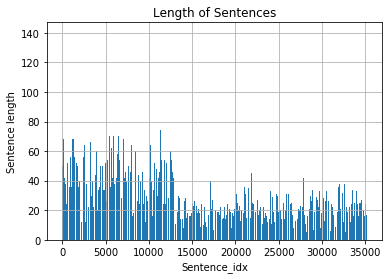

In [0]:
import matplotlib.pyplot as plt

# Sentences Histogram
plt.bar(range(1, 35178), length)
plt.xlabel('Sentence_idx')
plt.ylabel('Sentence length')
plt.title('Length of Sentences')
plt.grid(True)
plt.show()

In [0]:
import numpy as np

# Look for lemmas without repeat each one
n_lemas = set()
for i in df.lemma:
  n_lemas.add(i)
n_lemas = len(n_lemas)
print("Number of lemmas: ", n_lemas, "\nLongest sentence: ", max(length), "\nShortest sentence: ", min(length), "\nLength of sentence average: ", np.mean(length))

Number of lemmas:  20239 
Longest sentence:  140 
Shortest sentence:  1 
Length of sentence average:  29.871620661227507


### Respuesta 1.c

Las sentencias son en su mayoría de tamaños diferentes, lo cual tiene sentido ya que ninguna frase es igual a otra. Existen 17 tags, de estos el 85% corresponde al tag "0", el 4% corresponde a "B-geo", y 11% el resto. Existen unas redes llamadas [Recursive NN](https://en.wikipedia.org/wiki/Recursive_neural_network), las cuales setean los pesos de la red de forma recursiva a través de un input estructurado, sin embargo, debido a la naturaleza de la recursión, esta técnica no es computacionalmente viable en el caso de tener input demasiado pequeños junto con inputs demasiado grandes en un mismo dataset. Este mismo problema se presenta con el padding, ya que se decidio usar un max_len=80 sabiendo que existia una *sentence* de largo=1.

Finalmente el hecho de que se haya realizado el padding por la izquierda no afecta al *tag*, ya que luego se transforma en *One-Hot-Vector*, no obstante, para el *lemma* el input tendrá bastantes ceros al comienzo, por lo que la red tendra que ajustar los pesos partiendo de la idea de que algunas neuronas tenderán a ser relativamente inútiles, por lo que posiblemente resultaría factible realizar *Dropout* en algunas neuronas.

In [0]:
from keras.preprocessing.sequence import pad_sequences

max_len = 80
x = pad_sequences(dff.lemma.values,
                  maxlen=max_len,
                  padding='pre',
                  truncating='post'
)

In [0]:
y = pad_sequences(dff.tag.values,
                  maxlen=max_len,
                  padding='pre',
                  truncating='post'
)

#### 1.d Even more encodding and preprocessing

Para la primera tarea, buscaremos realizar la predicción del tag, la cual es una variable categórica. Por lo tanto, como ya sabemos de la tarea anterior, resulta conveniente tener los _targets_ en _one hot vector_. 

Además debemos separar ambos conjuntos (`x` e `y`) en los conjuntos de entrenamiento y validación. 

Realice esto con las herramientas y proporciones que estime convenientes. 

In [0]:
from keras.utils import to_categorical

# Transform y vector in binary matrix
y = to_categorical(y, num_classes=None, dtype='int8')

In [0]:
# Split data into training set and validation set

total = 35177
train_per = 0.7


# Shuffle the data
np.random.shuffle(x)
np.random.shuffle(y)

x_train = x[:int(train_per*total)]
x_val = x[int(train_per*total):]

y_train = y[:int(train_per*total)]
y_val = y[int(train_per*total):]

print(len(x_train) + len(x_val))
print(len(y_train) + len(y_val))

35177
35177


El siguiente código es utilizado para guardar y cargar los datos de entrenamiento y validación en caso de emergencia, para no tener que correr todo lo anterior.

In [0]:
# Save vectors if colab stops
with open('x_train.npy', 'wb') as fxt:
    np.save(fxt, x_train)

with open('x_val.npy', 'wb') as fxv:
    np.save(fxv, x_val)

In [0]:
with open('y_train.npy', 'wb') as fyt:
    np.save(fyt, y_train)

with open('y_val.npy', 'wb') as fyv:
    np.save(fyv, y_val)

In [0]:
from google.colab import files
import numpy as np

# Load vectors in case of lost
#uploaded = files.upload()

with open('x_train.npy', 'rb') as fxt:
    x_train = np.load(fxt)

with open('x_val.npy', 'rb') as fxv:
    x_val = np.load(fxv)

with open('y_train.npy', 'rb') as fyt:
    y_train = np.load(fyt)

with open('y_val.npy', 'rb') as fyv:
    y_val = np.load(fyv)

#### 1.e Primera red recurrente

Ahora entrenaremos una primera red recurrente LSTM. Explique la particularidad de estas redes y por qué podría comportarse bien para este tipo de problemas. 

La tarea de esta red será procesar la secuencia de _lemmas_ y predecir su _tag_. ¿Cuáles son las dimensiones de nuestro input y de nuestro output?

Considerando que si bien los _lemmas_ estan representados como enteros, esta representación no tiene ninguna relación con el "significado" de estos. Por eso, es recomendable utilizar otra representación que mejor extraiga la naturaleza "categorica" de estos, sin embargo por la cantidad de ejemplos que tenemos, no resultaría practico utilizar _one hot vector_, pues las dimensiones explotarían. Para esto, utilizaremos una primera capa que realiza una transformación entrenable entre el espacio discreto de la representación original y un _embedding_ en $\mathbb{R}^d$ donde $d$ corresponde a la dimensión de nuestro espacio de llegada.

Utilice un _embedding_ de dmensión 100, luego agregue una capa LSTM con 128 unidades y finalmente la capa densa de salida. Compile y entrene el modelo por al menos 10 epochs. Grafique el proceso de entrenamiento y evalue el desempeño final considerando alguna métrica relevante (F1 score, matriz de confusión, etc), considerando la repartición de clases que observó en la pregunta c.

In [0]:
x_val[7].shape

(80,)

### Respuesta 1.e

La gracia de estas redes es su capacidad procesar datos secuenciales. En este problema en particular una lstm es una buena idea, ya que evita el problema del desvanecimiento del gradiente descendente de la RNN convencional, en otras palabras, tiene una capacidad de recordar palabras que pueden tener un gap considerable entre ellas. Además las lstm permiten olvidar palabras que no afectan el resultado final con su compuerta de olvido.

Para cada input que entra en la red hay un vector de tamaño 80.

Para cada output que sale de la red ha una matriz de 80x18.

In [0]:
# Prediction metrics
def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives)
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives)
        return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall))

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, CuDNNLSTM
from keras import backend as K


max_len = 80
n_lemmas = 35177
embedding_dim = 100
n_labels = 18

ltsm = Sequential()

ltsm.add(Embedding(input_dim=n_lemmas, output_dim=embedding_dim, input_length=max_len))

ltsm.add(CuDNNLSTM(units=128,return_sequences=True)) # You can use CuDNNLSTM if you have a CUDA enabled GPU for faster performance

ltsm.add(Dense(n_labels, activation='softmax'))

ltsm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', recall_m, precision_m, f1_m])

history = ltsm.fit(x_train,y_train, validation_data=(x_val,y_val), epochs=10, batch_size=128)

loss, accuracy, f1_score, precision, recall = ltsm.evaluate(x_val, y_val, verbose=0)

Train on 24623 samples, validate on 10554 samples
Epoch 1/10
24623/24623 [==============================] - 5s 185us/step - loss: 0.8549 - acc: 0.7517 - recall_m: 0.6815 - precision_m: nan - f1_m: nan - val_loss: 0.6547 - val_acc: 0.8050 - val_recall_m: 0.7761 - val_precision_m: 0.8158 - val_f1_m: 0.7955
Epoch 2/10
24623/24623 [==============================] - 3s 136us/step - loss: 0.6358 - acc: 0.8104 - recall_m: 0.7824 - precision_m: 0.8249 - f1_m: 0.8031 - val_loss: 0.6334 - val_acc: 0.8065 - val_recall_m: 0.7885 - val_precision_m: 0.8209 - val_f1_m: 0.8044
Epoch 3/10
24623/24623 [==============================] - 3s 138us/step - loss: 0.6213 - acc: 0.8129 - recall_m: 0.7931 - precision_m: 0.8277 - f1_m: 0.8100 - val_loss: 0.6375 - val_acc: 0.8023 - val_recall_m: 0.7797 - val_precision_m: 0.8178 - val_f1_m: 0.7983
Epoch 4/10
24623/24623 [==============================] - 3s 137us/step - loss: 0.6149 - acc: 0.8143 - recall_m: 0.7949 - precision_m: 0.8290 - f1_m: 0.8116 - val_loss: 0

In [0]:
print("loss: ", loss, "\naccuracy: ", accuracy, "\nf1_score: ", f1_score, "\nprecision: ", precision, "\nrecall: ", recall)

loss:  0.646458836764758 
accuracy:  0.8091730617293134 
f1_score:  0.792445991309005 
precision:  0.8210834282488676 
recall:  0.8065083224438618


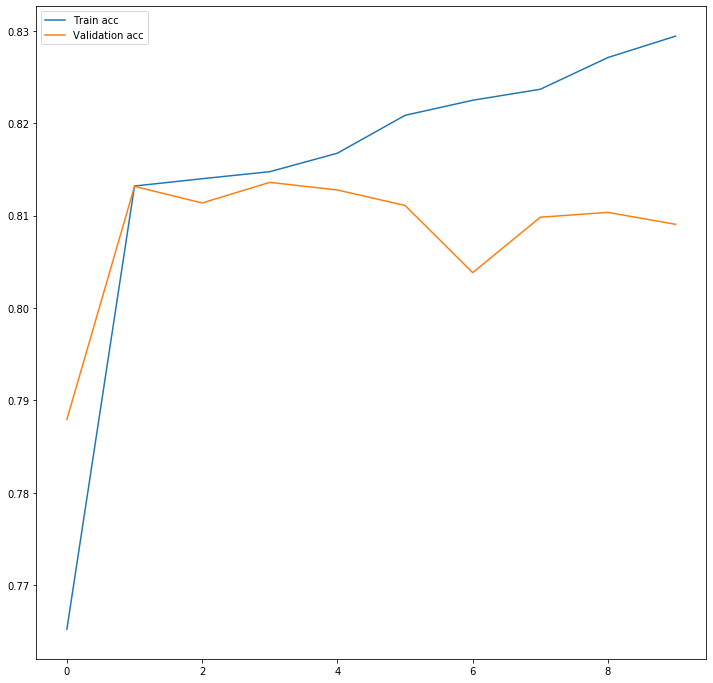

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

hist = pd.DataFrame(history.history)

plt.figure(figsize=(12,12))
plt.plot(hist["acc"], label="Train acc")
plt.plot(hist["val_acc"], label="Validation acc")
plt.legend()
plt.show()

Observando el gráfico y las metricas, se puede decir que el modelo es suficientemente robusto, sin embargo se puede seguir mejorando.

In [0]:
from keras.utils import print_summary
print_summary(ltsm)

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 80, 100)           3517700   
_________________________________________________________________
cu_dnnlstm_10 (CuDNNLSTM)    (None, 80, 128)           117760    
_________________________________________________________________
dense_9 (Dense)              (None, 80, 18)            2322      
Total params: 3,637,782
Trainable params: 3,637,782
Non-trainable params: 0
_________________________________________________________________


#### 1.f Comparación con otras aproximaciones. 

Ahora entrenaremos dos redes más para comparar los desempeños de la red recurrente. Para esto entrenaremos una red convolucional 1-dimensional y una red densa. Discuta las diferencias entre ambas redes y la red recurrente, y cual cree a priori se adecua mejor a la naturaleza del problema. 

Defina y entrene luego las redes con la misma primera capa de encodding y las siguientes configuraciones:
* Convolucional: 2 capas conv1d con 128 filtros y kernel de tamaño 5
* Densa: 2 capas densas de 128 unidades

Compare los desempeños de las 3 redes en el problema su métrica preferida

### Respuesta 1.f

Tanto la red Densa como la Convolucional intentan mapear las características externas de la secuencia a características internas. Una red convolucional tipo conv1d es util en el caso en que no es tan importante en que parte de la secuencia esta localizada la característica. Las RNN y en especifico la LSTM tienen en cuenta la proximidad de las palabras para crear patrones entrenables, por lo tanto esta última deberían ser la red idónea para esta tarea.

#### Red Densa

In [0]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D
from keras import backend as K

max_len = 80
n_lemmas = 35177
embedding_dim = 100
n_labels = 18

densa = Sequential()
densa.add(Embedding(input_dim=n_lemmas, output_dim=embedding_dim, input_length=max_len))
densa.add(Dense(128, activation='relu'))
densa.add(Dense(128, activation='relu'))
densa.add(Dense(n_labels, activation='softmax'))

densa.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', recall_m, precision_m, f1_m])

history = densa.fit(x_train,y_train, validation_data=(x_val,y_val), epochs=10, batch_size=128)

loss, accuracy, f1_score, precision, recall = densa.evaluate(x_val, y_val, verbose=0)

Train on 24623 samples, validate on 10554 samples
Epoch 1/10
24623/24623 [==============================] - 2s 91us/step - loss: 1.0483 - acc: 0.7367 - recall_m: 0.6115 - precision_m: nan - f1_m: nan - val_loss: 0.7831 - val_acc: 0.7536 - val_recall_m: 0.7437 - val_precision_m: 0.7571 - val_f1_m: 0.7503
Epoch 2/10
24623/24623 [==============================] - 2s 69us/step - loss: 0.7825 - acc: 0.7512 - recall_m: 0.7434 - precision_m: 0.7559 - f1_m: 0.7496 - val_loss: 0.7821 - val_acc: 0.7533 - val_recall_m: 0.7476 - val_precision_m: 0.7557 - val_f1_m: 0.7516
Epoch 3/10
24623/24623 [==============================] - 2s 69us/step - loss: 0.7795 - acc: 0.7521 - recall_m: 0.7455 - precision_m: 0.7560 - f1_m: 0.7507 - val_loss: 0.7833 - val_acc: 0.7532 - val_recall_m: 0.7494 - val_precision_m: 0.7549 - val_f1_m: 0.7521
Epoch 4/10
24623/24623 [==============================] - 2s 69us/step - loss: 0.7784 - acc: 0.7524 - recall_m: 0.7455 - precision_m: 0.7565 - f1_m: 0.7510 - val_loss: 0.783

In [0]:
print("loss: ", loss, "\naccuracy: ", accuracy, "\nf1_score: ", f1_score, "\nprecision: ", precision, "\nrecall: ", recall)

loss:  0.7905135627653148 
accuracy:  0.7525748540918236 
f1_score:  0.7455775064231095 
precision:  0.7559736205001254 
recall:  0.750737116138931


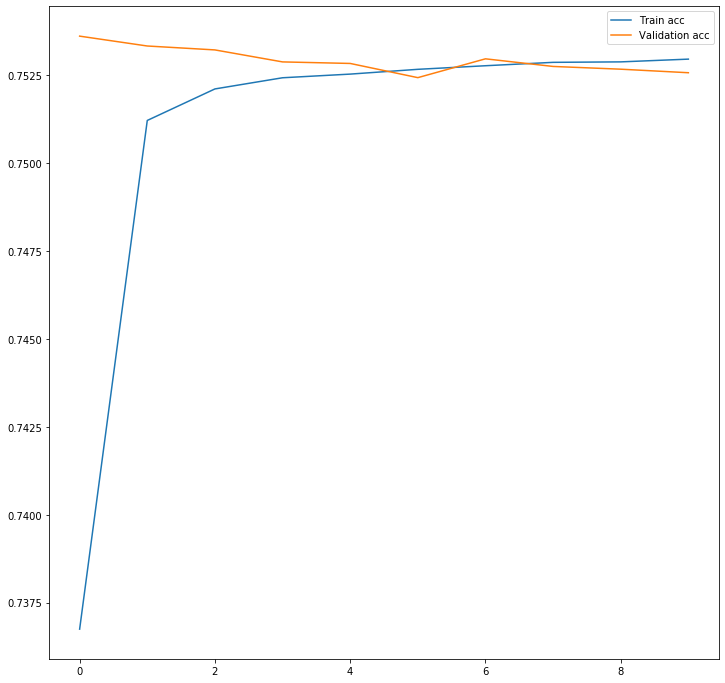

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

hist = pd.DataFrame(history.history)

plt.figure(figsize=(12,12))
plt.plot(hist["acc"], label="Train acc")
plt.plot(hist["val_acc"], label="Validation acc")
plt.legend()
plt.show()

Observando el gráfico se puede apreciar que el modelo está sobreajustando y no está aprendiendo nada, solo se está aprendiendo los datos de entrenamiento.

In [0]:
from keras.utils import print_summary
print_summary(densa)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 80, 100)           3517700   
_________________________________________________________________
dense_4 (Dense)              (None, 80, 128)           12928     
_________________________________________________________________
dense_5 (Dense)              (None, 80, 128)           16512     
_________________________________________________________________
dense_6 (Dense)              (None, 80, 18)            2322      
Total params: 3,549,462
Trainable params: 3,549,462
Non-trainable params: 0
_________________________________________________________________


#### Red Convolucional

In [0]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D
from keras import backend as K

max_len = 80
n_lemmas = 35177
embedding_dim = 100
n_labels = 18

conv = Sequential()
conv.add(Embedding(input_dim=n_lemmas, output_dim=embedding_dim, input_length=max_len))
conv.add(Conv1D(128, 5, padding='same', activation='relu'))
conv.add(Conv1D(128, 5, padding='same', activation='softmax'))
conv.add(Dense(n_labels, activation='softmax'))

conv.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', recall_m, precision_m, f1_m])

history = conv.fit(x_train,y_train, validation_data=(x_val,y_val), epochs=10, batch_size=128)

loss, accuracy, f1_score, precision, recall = conv.evaluate(x_val, y_val, verbose=0)

Train on 24623 samples, validate on 10554 samples
Epoch 1/10
24623/24623 [==============================] - 11s 453us/step - loss: 2.3977 - acc: 0.6179 - recall_m: 0.0000e+00 - precision_m: nan - f1_m: nan - val_loss: 2.0767 - val_acc: 0.6265 - val_recall_m: 0.0000e+00 - val_precision_m: nan - val_f1_m: nan
Epoch 2/10
24623/24623 [==============================] - 2s 98us/step - loss: 1.8543 - acc: 0.6277 - recall_m: 0.0000e+00 - precision_m: nan - f1_m: nan - val_loss: 1.6582 - val_acc: 0.6265 - val_recall_m: 0.0000e+00 - val_precision_m: nan - val_f1_m: nan
Epoch 3/10
24623/24623 [==============================] - 2s 97us/step - loss: 1.5143 - acc: 0.6277 - recall_m: 0.0000e+00 - precision_m: nan - f1_m: nan - val_loss: 1.3907 - val_acc: 0.6265 - val_recall_m: 0.0000e+00 - val_precision_m: nan - val_f1_m: nan
Epoch 4/10
24623/24623 [==============================] - 2s 95us/step - loss: 1.3018 - acc: 0.6277 - recall_m: 0.0000e+00 - precision_m: nan - f1_m: nan - val_loss: 1.2270 - va

In [0]:
print("loss: ", loss, "\naccuracy: ", accuracy, "\nf1_score: ", f1_score, "\nprecision: ", precision, "\nrecall: ", recall)

loss:  0.9825468676004849 
accuracy:  0.6264804812324347 
f1_score:  0.6264686375624848 
precision:  0.6265083629682431 
recall:  0.6264884861689841


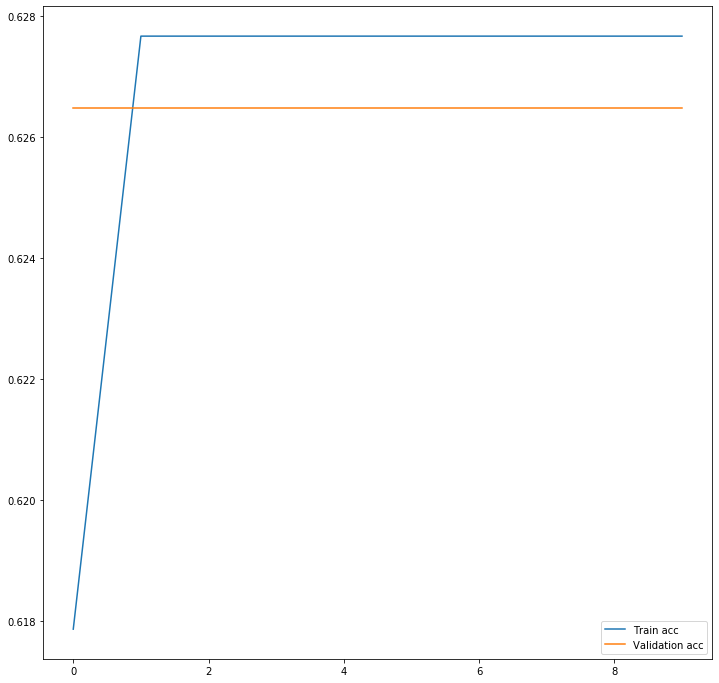

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

hist = pd.DataFrame(history.history)

plt.figure(figsize=(12,12))
plt.plot(hist["acc"], label="Train acc")
plt.plot(hist["val_acc"], label="Validation acc")
plt.legend()
plt.show()

Observando el gráfico se puede apreciar que el modelo está sobreajustando aun más que el anterior y no está aprendiendo nada, solo se está aprendiendo los datos de entrenamiento.

In [0]:
from keras.utils import print_summary
print_summary(conv)

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_20 (Embedding)     (None, 80, 100)           3517700   
_________________________________________________________________
conv1d_35 (Conv1D)           (None, 80, 128)           64128     
_________________________________________________________________
conv1d_36 (Conv1D)           (None, 80, 128)           82048     
_________________________________________________________________
dense_23 (Dense)             (None, 80, 18)            2322      
Total params: 3,666,198
Trainable params: 3,666,198
Non-trainable params: 0
_________________________________________________________________


###### Conclusión 1.f

Comparando las curvas de aprendizaje, es evidente que el mejor resultado hasta ahora lo tuvo la lstm. sus medidas de accuracy, precision, recall y f1_score de un 81% aproximadando a la centésima. Al parecer la red densa resulto ser mejor  modelo (en términos de las métricas anteriormente mencionadas) que la red convolucional, considerando los parámetros con los que se pidió armarlas.

Considerando número de parámetros que aprende cada red, pero sin contar el embedding (3517700), ni la capa densa softmax de salida (2322) para que se aprecie mejor se tiene: 
 * lstm: 3,637,782 - 3517700 - 2322 = 117760
 * densa: 3,549,462 - 3517700 - 2322 = 29440
 * conv: 3,666,198 - 3517700 - 2322 = 146176

El menor número de parametros lo tiene la red densa con un accuracy: 75%, por lo tanto se puede decir que si se pasa de Dense a LSTM, el costo de aumetar el accuracy de las predicciones en un 5% equivale a agregar 117760 - 29440 = 88320 parámetros.

Si bien es bastante lo que hay que aumentar la complejidad del modelo para obtener un mejor accuracy (5% más), vale la pena ya que es un modelo secuencial mejor para el problema.

#### 1.g Red más profunda o bidireccional

Una pregunta natural que surge es saber que ocurre al aumentar la profundidad de la red, o por ejemplo porqué solo se recorre el _input_ en la dirección original. Considerando el tiempo acotado de este semestre, pueden elegir realizar una de las dos exploraciones solamente. 

* Profundidad: Entrene un par de redes con más capas LSTM y grafique como se comporta el desempeño a medida se aumenta la profundidad
* Bidireccional: Varie la cantidad de unidades (a lo menos 4 valores distintos) de la capa LSTM y compare con la red utilizando capas LSTM bidireccionales (como muestra el código). Comente sobre el número de parámetros en ambos casos.

Train on 24623 samples, validate on 10554 samples
Epoch 1/10
24623/24623 [==============================] - 8s 327us/step - loss: 0.9049 - acc: 0.7667 - recall_m: 0.6709 - precision_m: nan - f1_m: nan - val_loss: 0.6247 - val_acc: 0.8128 - val_recall_m: 0.7888 - val_precision_m: 0.8301 - val_f1_m: 0.8089
Epoch 2/10
24623/24623 [==============================] - 3s 142us/step - loss: 0.6118 - acc: 0.8174 - recall_m: 0.7960 - precision_m: 0.8334 - f1_m: 0.8143 - val_loss: 0.6222 - val_acc: 0.8119 - val_recall_m: 0.7921 - val_precision_m: 0.8267 - val_f1_m: 0.8090
Epoch 3/10
24623/24623 [==============================] - 3s 139us/step - loss: 0.5955 - acc: 0.8230 - recall_m: 0.8010 - precision_m: 0.8397 - f1_m: 0.8198 - val_loss: 0.6315 - val_acc: 0.8069 - val_recall_m: 0.7836 - val_precision_m: 0.8236 - val_f1_m: 0.8031
Epoch 4/10
24623/24623 [==============================] - 3s 139us/step - loss: 0.5709 - acc: 0.8321 - recall_m: 0.8119 - precision_m: 0.8476 - f1_m: 0.8294 - val_loss: 0

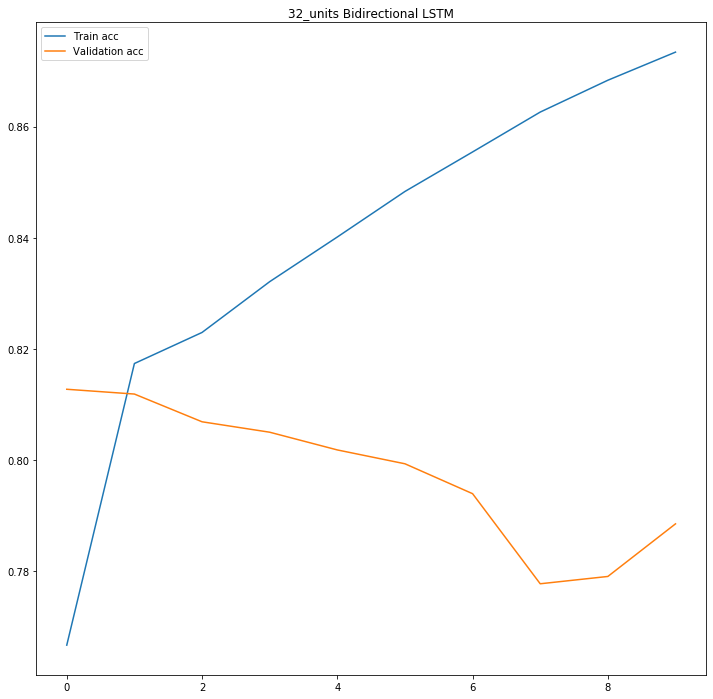



Train on 24623 samples, validate on 10554 samples
Epoch 1/10
24623/24623 [==============================] - 9s 354us/step - loss: 0.7915 - acc: 0.7850 - recall_m: 0.7333 - precision_m: nan - f1_m: nan - val_loss: 0.6242 - val_acc: 0.8116 - val_recall_m: 0.7991 - val_precision_m: 0.8213 - val_f1_m: 0.8100
Epoch 2/10
24623/24623 [==============================] - 4s 145us/step - loss: 0.6134 - acc: 0.8165 - recall_m: 0.7981 - precision_m: 0.8304 - f1_m: 0.8139 - val_loss: 0.6195 - val_acc: 0.8127 - val_recall_m: 0.7877 - val_precision_m: 0.8307 - val_f1_m: 0.8087
Epoch 3/10
24623/24623 [==============================] - 4s 148us/step - loss: 0.6001 - acc: 0.8223 - recall_m: 0.8022 - precision_m: 0.8375 - f1_m: 0.8194 - val_loss: 0.6289 - val_acc: 0.8088 - val_recall_m: 0.7883 - val_precision_m: 0.8236 - val_f1_m: 0.8056
Epoch 4/10
24623/24623 [==============================] - 4s 146us/step - loss: 0.5783 - acc: 0.8305 - recall_m: 0.8116 - precision_m: 0.8450 - f1_m: 0.8280 - val_loss:

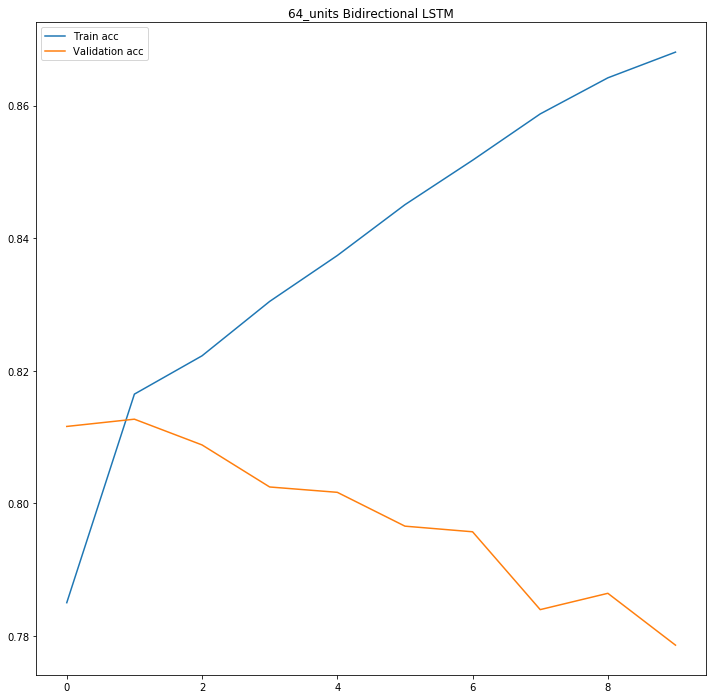



Train on 24623 samples, validate on 10554 samples
Epoch 1/10
24623/24623 [==============================] - 9s 384us/step - loss: 0.7406 - acc: 0.7942 - recall_m: 0.7540 - precision_m: nan - f1_m: nan - val_loss: 0.6202 - val_acc: 0.8133 - val_recall_m: 0.7998 - val_precision_m: 0.8237 - val_f1_m: 0.8116
Epoch 2/10
24623/24623 [==============================] - 4s 167us/step - loss: 0.6133 - acc: 0.8167 - recall_m: 0.7976 - precision_m: 0.8310 - f1_m: 0.8140 - val_loss: 0.6206 - val_acc: 0.8122 - val_recall_m: 0.7916 - val_precision_m: 0.8275 - val_f1_m: 0.8092
Epoch 3/10
24623/24623 [==============================] - 4s 166us/step - loss: 0.6029 - acc: 0.8218 - recall_m: 0.8030 - precision_m: 0.8360 - f1_m: 0.8192 - val_loss: 0.6267 - val_acc: 0.8090 - val_recall_m: 0.7889 - val_precision_m: 0.8236 - val_f1_m: 0.8059
Epoch 4/10
24623/24623 [==============================] - 4s 170us/step - loss: 0.5869 - acc: 0.8277 - recall_m: 0.8093 - precision_m: 0.8419 - f1_m: 0.8253 - val_loss:

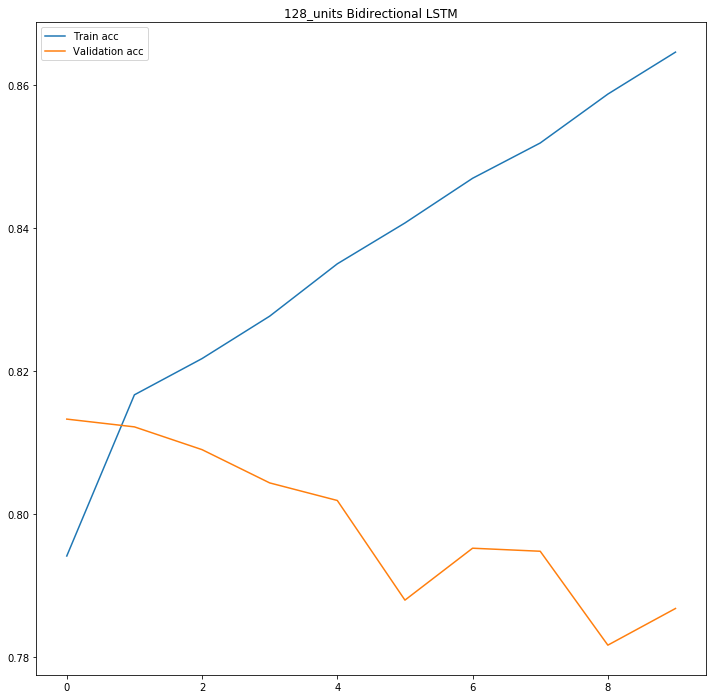



Train on 24623 samples, validate on 10554 samples
Epoch 1/10
24623/24623 [==============================] - 12s 478us/step - loss: 0.7018 - acc: 0.7995 - recall_m: 0.7693 - precision_m: nan - f1_m: nan - val_loss: 0.6267 - val_acc: 0.8102 - val_recall_m: 0.7958 - val_precision_m: 0.8210 - val_f1_m: 0.8082
Epoch 2/10
24623/24623 [==============================] - 6s 260us/step - loss: 0.6151 - acc: 0.8160 - recall_m: 0.7982 - precision_m: 0.8295 - f1_m: 0.8136 - val_loss: 0.6221 - val_acc: 0.8111 - val_recall_m: 0.7954 - val_precision_m: 0.8230 - val_f1_m: 0.8089
Epoch 3/10
24623/24623 [==============================] - 6s 262us/step - loss: 0.6053 - acc: 0.8205 - recall_m: 0.8022 - precision_m: 0.8344 - f1_m: 0.8179 - val_loss: 0.6265 - val_acc: 0.8094 - val_recall_m: 0.7890 - val_precision_m: 0.8245 - val_f1_m: 0.8064
Epoch 4/10
24623/24623 [==============================] - 6s 264us/step - loss: 0.5897 - acc: 0.8268 - recall_m: 0.8085 - precision_m: 0.8408 - f1_m: 0.8243 - val_loss

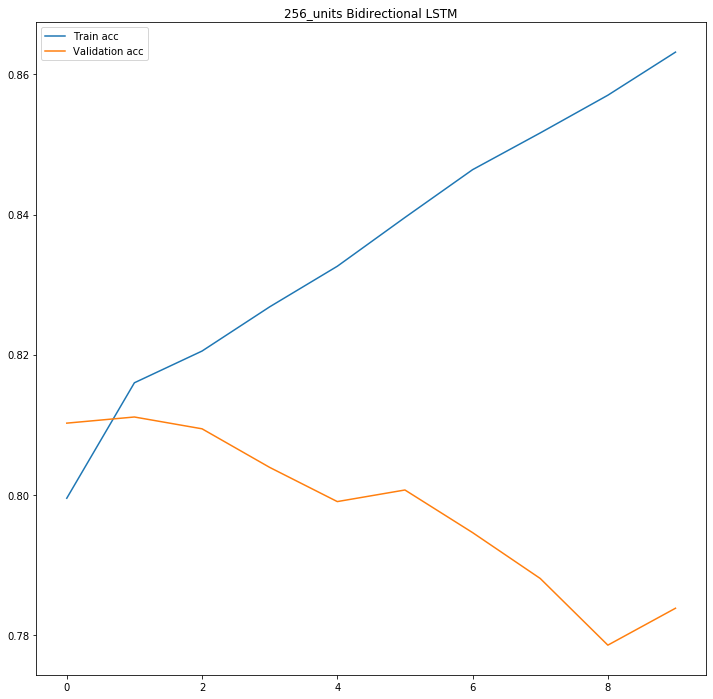

In [0]:
from keras.models import Sequential
from keras.layers import Bidirectional, CuDNNLSTM
from keras.layers import Dense
from keras.layers import Embedding

max_len = 80
n_lemmas = 35177
embedding_dim = 100
n_labels = 18



for n_units in map(lambda x: 2**x, range(5, 9)): # Powers of two    
    
    b_lstm = Sequential()
    b_lstm.add(Embedding(input_dim=n_lemmas, output_dim=embedding_dim, input_length=max_len))

    b_lstm.add(Bidirectional(CuDNNLSTM(units=n_units,return_sequences=True) ) ) 
    b_lstm.add(Dense(n_labels, activation='softmax'))

    
    b_lstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', recall_m, precision_m, f1_m])

    history = b_lstm.fit(x_train,y_train, validation_data=(x_val,y_val), epochs=10, batch_size=128)
    

    loss, accuracy, f1_score, precision, recall = b_lstm.evaluate(x_val, y_val, verbose=0)
    print("\n-------------------------BiLSTM with " + str(n_units) + "units\n")
    print("\nNumber de parameters: ", b_lstm.summary(), "\nLoss", loss, "\nAccuracy", accuracy, "\nF1 score", f1_score, "\nPrecision", precision, "\nRecall", recall)       

    hist = pd.DataFrame(history.history)
    plt.figure(figsize=(12,12))
    plt.plot(hist["acc"], label="Train acc")
    plt.plot(hist["val_acc"], label="Validation acc")
    plt.legend()
    plt.title(str(n_units) + "_units Bidirectional LSTM")
    plt.show()
    print("\n")
    

### Respuesta 1.g

El mejor modelo es el que tiene 32 unidades en la capa bideireccional_LSTM, con un accuracy de 79% aproximado a la centésima. En cuanto al número de parámetros las dimensiones de las matrices de pesos de la capa de BLSTM aumentan el 2 ya que ahora hay que tomar en cuenta los inputs del futuro. Con 128 unidades se habrá una matriz con forma: (max_len, 256). Para la misma cantidad de unidades hay 235520 parametros esta vez, en comparación con la cantidad de la LSTM unidireccional que tenía 117760 (el doble de parámetros). 

#### 1.h Dimensión del Embedding

Como podrán haber notado, gran parte de los parámetros entrenables se encuentran en el embedding. Elija una de las redes entrenadas anteriormente y varíe la dimensión del embedding en un conjunto de potencias de 2 que le parezca razonable (a lo menos 6 valores). Comente sus observaciones.

### Respuesta 1.h

Si bien la red con mejor accuracy hasta ahora es la LSTM unidireccional del principio, se eligirá la BLSTM de 32 unidades por un asunto de costo computacional, ya que tiene pocos parámetros y el accuracy difiere en 2% menos aproximadamente.

Train on 24623 samples, validate on 10554 samples
Epoch 1/10
24623/24623 [==============================] - 9s 368us/step - loss: 0.9211 - acc: 0.7607 - recall_m: 0.6655 - precision_m: nan - f1_m: nan - val_loss: 0.6258 - val_acc: 0.8138 - val_recall_m: 0.7999 - val_precision_m: 0.8245 - val_f1_m: 0.8120
Epoch 2/10
24623/24623 [==============================] - 3s 132us/step - loss: 0.6181 - acc: 0.8154 - recall_m: 0.7991 - precision_m: 0.8279 - f1_m: 0.8133 - val_loss: 0.6218 - val_acc: 0.8136 - val_recall_m: 0.7935 - val_precision_m: 0.8286 - val_f1_m: 0.8107
Epoch 3/10
24623/24623 [==============================] - 3s 129us/step - loss: 0.6080 - acc: 0.8190 - recall_m: 0.7990 - precision_m: 0.8341 - f1_m: 0.8162 - val_loss: 0.6323 - val_acc: 0.8051 - val_recall_m: 0.7801 - val_precision_m: 0.8236 - val_f1_m: 0.8013
Epoch 4/10
24623/24623 [==============================] - 3s 130us/step - loss: 0.5916 - acc: 0.8255 - recall_m: 0.8042 - precision_m: 0.8418 - f1_m: 0.8226 - val_loss: 0

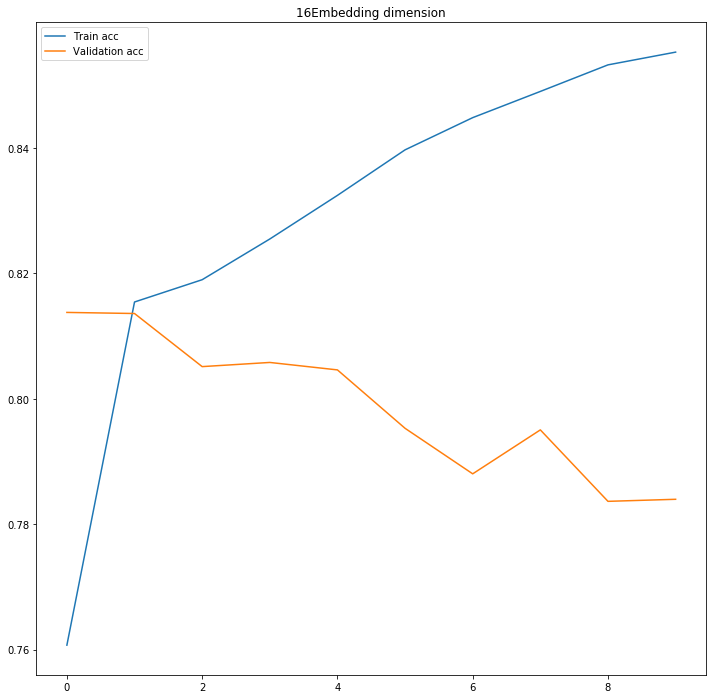



Train on 24623 samples, validate on 10554 samples
Epoch 1/10
24623/24623 [==============================] - 9s 363us/step - loss: 0.9403 - acc: 0.7562 - recall_m: 0.6586 - precision_m: nan - f1_m: nan - val_loss: 0.6235 - val_acc: 0.8138 - val_recall_m: 0.7998 - val_precision_m: 0.8246 - val_f1_m: 0.8120
Epoch 2/10
24623/24623 [==============================] - 3s 130us/step - loss: 0.6158 - acc: 0.8160 - recall_m: 0.7997 - precision_m: 0.8285 - f1_m: 0.8138 - val_loss: 0.6192 - val_acc: 0.8132 - val_recall_m: 0.7964 - val_precision_m: 0.8260 - val_f1_m: 0.8109
Epoch 3/10
24623/24623 [==============================] - 3s 135us/step - loss: 0.6065 - acc: 0.8196 - recall_m: 0.8022 - precision_m: 0.8328 - f1_m: 0.8172 - val_loss: 0.6249 - val_acc: 0.8103 - val_recall_m: 0.7912 - val_precision_m: 0.8244 - val_f1_m: 0.8075
Epoch 4/10
24623/24623 [==============================] - 3s 129us/step - loss: 0.5901 - acc: 0.8260 - recall_m: 0.8077 - precision_m: 0.8400 - f1_m: 0.8235 - val_loss:

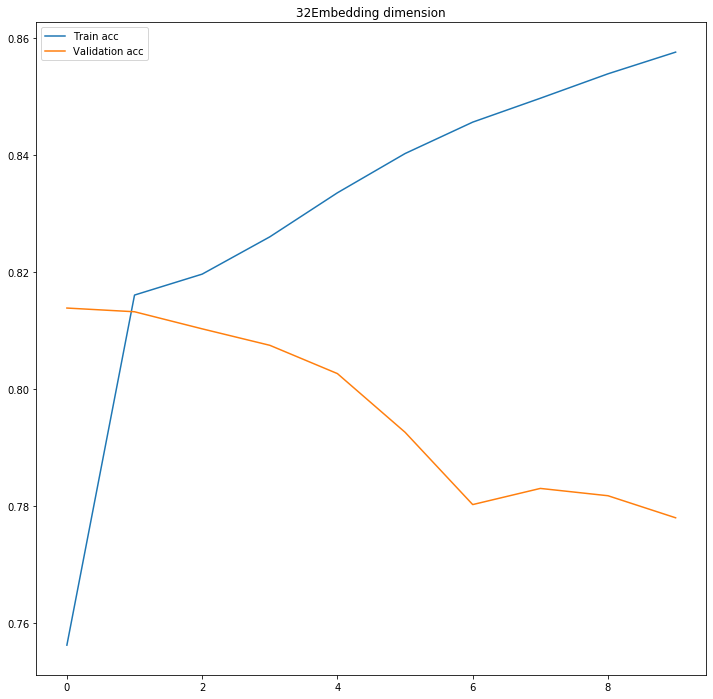



Train on 24623 samples, validate on 10554 samples
Epoch 1/10
24623/24623 [==============================] - 9s 369us/step - loss: 0.8886 - acc: 0.7691 - recall_m: 0.6808 - precision_m: nan - f1_m: nan - val_loss: 0.6241 - val_acc: 0.8135 - val_recall_m: 0.7919 - val_precision_m: 0.8295 - val_f1_m: 0.8103
Epoch 2/10
24623/24623 [==============================] - 3s 133us/step - loss: 0.6149 - acc: 0.8165 - recall_m: 0.7948 - precision_m: 0.8330 - f1_m: 0.8134 - val_loss: 0.6214 - val_acc: 0.8125 - val_recall_m: 0.7885 - val_precision_m: 0.8301 - val_f1_m: 0.8088
Epoch 3/10
24623/24623 [==============================] - 3s 135us/step - loss: 0.5979 - acc: 0.8230 - recall_m: 0.8013 - precision_m: 0.8395 - f1_m: 0.8199 - val_loss: 0.6337 - val_acc: 0.8085 - val_recall_m: 0.7917 - val_precision_m: 0.8210 - val_f1_m: 0.8061
Epoch 4/10
24623/24623 [==============================] - 3s 136us/step - loss: 0.5742 - acc: 0.8314 - recall_m: 0.8125 - precision_m: 0.8460 - f1_m: 0.8289 - val_loss:

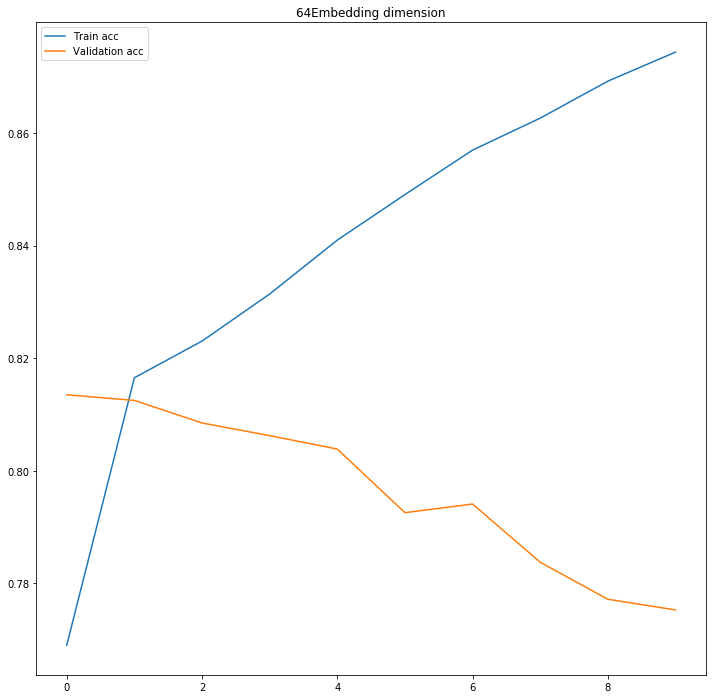



Train on 24623 samples, validate on 10554 samples
Epoch 1/10
24623/24623 [==============================] - 10s 398us/step - loss: 0.8717 - acc: 0.7699 - recall_m: 0.6854 - precision_m: nan - f1_m: nan - val_loss: 0.6235 - val_acc: 0.8131 - val_recall_m: 0.7967 - val_precision_m: 0.8257 - val_f1_m: 0.8110
Epoch 2/10
24623/24623 [==============================] - 4s 144us/step - loss: 0.6137 - acc: 0.8170 - recall_m: 0.7982 - precision_m: 0.8311 - f1_m: 0.8143 - val_loss: 0.6230 - val_acc: 0.8104 - val_recall_m: 0.7943 - val_precision_m: 0.8227 - val_f1_m: 0.8083
Epoch 3/10
24623/24623 [==============================] - 3s 142us/step - loss: 0.5985 - acc: 0.8231 - recall_m: 0.8049 - precision_m: 0.8371 - f1_m: 0.8207 - val_loss: 0.6270 - val_acc: 0.8092 - val_recall_m: 0.7910 - val_precision_m: 0.8226 - val_f1_m: 0.8065
Epoch 4/10
24623/24623 [==============================] - 4s 144us/step - loss: 0.5787 - acc: 0.8307 - recall_m: 0.8131 - precision_m: 0.8442 - f1_m: 0.8284 - val_loss

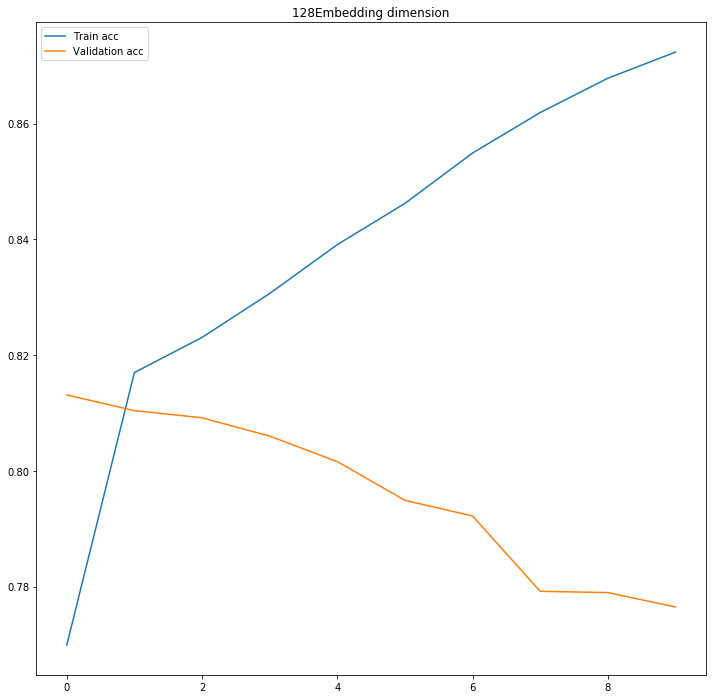



Train on 24623 samples, validate on 10554 samples
Epoch 1/10
24623/24623 [==============================] - 10s 426us/step - loss: 0.8562 - acc: 0.7725 - recall_m: 0.6858 - precision_m: nan - f1_m: nan - val_loss: 0.6207 - val_acc: 0.8124 - val_recall_m: 0.7918 - val_precision_m: 0.8276 - val_f1_m: 0.8093
Epoch 2/10
24623/24623 [==============================] - 4s 167us/step - loss: 0.6093 - acc: 0.8181 - recall_m: 0.7988 - precision_m: 0.8325 - f1_m: 0.8153 - val_loss: 0.6217 - val_acc: 0.8116 - val_recall_m: 0.7944 - val_precision_m: 0.8245 - val_f1_m: 0.8091
Epoch 3/10
24623/24623 [==============================] - 4s 173us/step - loss: 0.5910 - acc: 0.8247 - recall_m: 0.8079 - precision_m: 0.8379 - f1_m: 0.8226 - val_loss: 0.6331 - val_acc: 0.8091 - val_recall_m: 0.7947 - val_precision_m: 0.8197 - val_f1_m: 0.8070
Epoch 4/10
24623/24623 [==============================] - 4s 170us/step - loss: 0.5661 - acc: 0.8330 - recall_m: 0.8175 - precision_m: 0.8454 - f1_m: 0.8312 - val_loss

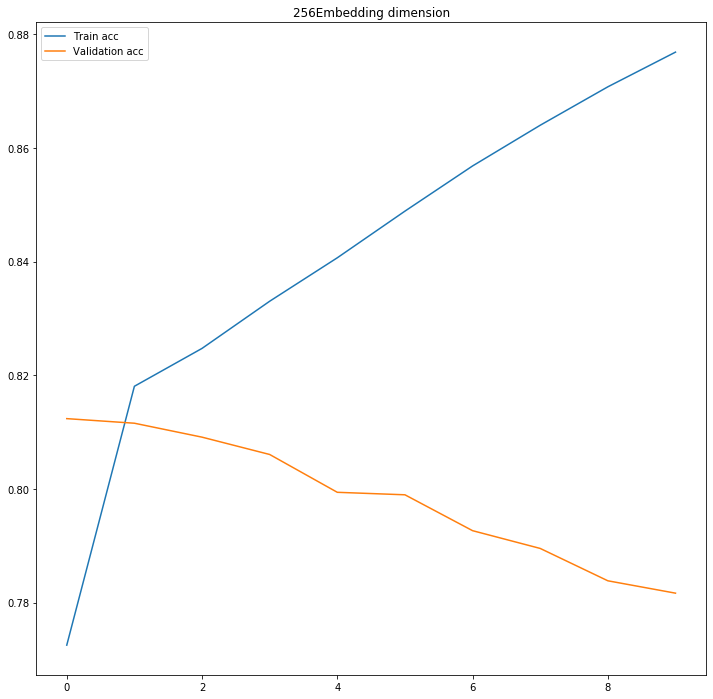



Train on 24623 samples, validate on 10554 samples
Epoch 1/10
24623/24623 [==============================] - 12s 493us/step - loss: 0.8389 - acc: 0.7672 - recall_m: 0.7024 - precision_m: nan - f1_m: nan - val_loss: 0.6280 - val_acc: 0.8116 - val_recall_m: 0.7957 - val_precision_m: 0.8235 - val_f1_m: 0.8094
Epoch 2/10
24623/24623 [==============================] - 5s 223us/step - loss: 0.6091 - acc: 0.8179 - recall_m: 0.7993 - precision_m: 0.8320 - f1_m: 0.8153 - val_loss: 0.6245 - val_acc: 0.8116 - val_recall_m: 0.7927 - val_precision_m: 0.8255 - val_f1_m: 0.8087
Epoch 3/10
24623/24623 [==============================] - 5s 222us/step - loss: 0.5871 - acc: 0.8255 - recall_m: 0.8070 - precision_m: 0.8395 - f1_m: 0.8229 - val_loss: 0.6340 - val_acc: 0.8086 - val_recall_m: 0.7908 - val_precision_m: 0.8214 - val_f1_m: 0.8058
Epoch 4/10
24623/24623 [==============================] - 5s 223us/step - loss: 0.5579 - acc: 0.8358 - recall_m: 0.8187 - precision_m: 0.8492 - f1_m: 0.8337 - val_loss

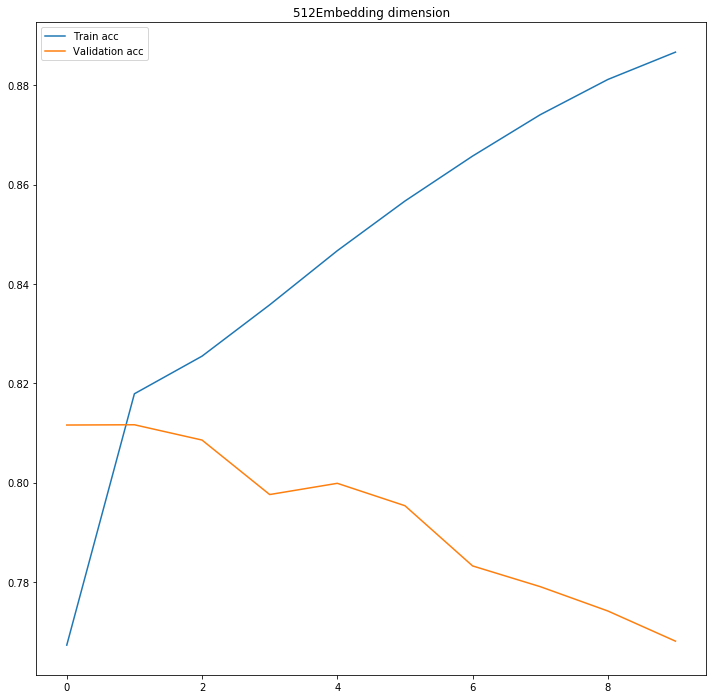

In [0]:
from keras.models import Sequential
from keras.layers import Bidirectional, CuDNNLSTM
from keras.layers import Dense
from keras.layers import Embedding

max_len = 80
n_lemmas = 35177
n_labels = 18
n_units = 32



for embedding_dim in map(lambda x: 2**x, range(4, 10)): # Powers of two    
    
    b_lstm = Sequential()
    b_lstm.add(Embedding(input_dim=n_lemmas, output_dim=embedding_dim, input_length=max_len))

    b_lstm.add(Bidirectional(CuDNNLSTM(units=n_units,return_sequences=True) ) ) 
    b_lstm.add(Dense(n_labels, activation='softmax'))

    
    b_lstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', recall_m, precision_m, f1_m])

    history = b_lstm.fit(x_train,y_train, validation_data=(x_val,y_val), epochs=10, batch_size=128)
    

    loss, accuracy, f1_score, precision, recall = b_lstm.evaluate(x_val, y_val, verbose=0)
    print("\n\n-------------------------------------------------------")
    print("\n----------------BiLSTM with " + str(n_units) + "units and embedding dimension:" + str(embedding_dim) + "\n")
    print("\nNumber de parameters: ", b_lstm.summary(), "\nLoss", loss, "\nAccuracy", accuracy, "\nF1 score", f1_score, "\nPrecision", precision, "\nRecall", recall)       

    hist = pd.DataFrame(history.history)
    plt.figure(figsize=(12,12))
    plt.plot(hist["acc"], label="Train acc")
    plt.plot(hist["val_acc"], label="Validation acc")
    plt.legend()
    plt.title(str(embedding_dim) + "Embedding dimension")
    plt.show()
    print("\n")

El embedding con dimensión 16 (78.39%) y el con dimensión 256 (78.16%) logran un muy buen desempeño, además de sus altos valores en el resto de las métricas. El hecho de que los tamaños de embeddings sean tan distintos y sus resultados sean tan parecidos me parece un misterio.

#### 1.i Escribamos palabras - Datasest

Ahora buscaremos otra aplicación a las redes recurrentes, predecir el caracter siguiente. Si logramos entrenar una red que sea buena en esta tarea, podremos escribir texto automáticamente, pues podemos, a partir de una frase, predecir el caracter siguiente, y luego introducir la nueva frase sin el primer caracter en la red nuevamente, e iterando así escribir automáticamente. Si bien las redes recurrentes son adecuadas para esta tarea, no pretendemos entrenar un _Shakespeare_ en esta tarea, sin embargo es interesante investigar qué tan verosimil o no puede lograr ser el texto generado. 

Para esto, primero crearmos nuestro nuevo dataset. Para esta tarea preferiremos unir todas las frases en un solo gran corpus y luego crear nuevas secuencias semi redundantes. Esto nos evita primero el problema de tener que hacer padding, pues crearemos todas las entradas iguales, pero también nos permite aprovechar mejormente el dataset, de cierta forma aumentando el número de datos. El _target_ en este caso será solo el caracter siguiente correspondiente a cada secuencia. 

En este item debe cargar el dataset, completando el código propuesto abajo. 

In [5]:
df_w = pd.read_csv("ner.csv", engine='python', error_bad_lines=False)

df_w = df_w.dropna()[['word']]

Skipping line 281837: Expected 25 fields in line 281837, saw 34


In [0]:
from keras.utils import to_categorical

corpus = ' '.join(list(df_w.word.values)).lower()

sentence_length = 40
steps = 5

sentences = []
next_char = []
for i in range(0,len(corpus) - sentence_length - 1 , steps):
    sentences.append(corpus[i:i+sentence_length])
    next_char.append(corpus[i+sentence_length])

chars_to_code = {char:code for code, char in enumerate(set(corpus))}
code_to_chars = {code:char for char,code in chars_to_code.items()}

x = pd.np.array([[chars_to_code[char] for char in sentence] for sentence in sentences])
y = pd.np.array([chars_to_code[next_] for next_ in next_char])
y = to_categorical(y)


In [20]:
print(x.shape, y.shape)

(1213495, 40) (1213495, 60)


In [0]:
from sklearn.model_selection import train_test_split

xw_train, xw_val, yw_train, yw_val = train_test_split(x, y, test_size=0.3)

In [0]:
# Save vector

with open('xw_train.npy', 'wb') as fxt:
    np.save(fxt, xw_train)

with open('xw_val.npy', 'wb') as fxv:
    np.save(fxv, xw_val)

with open('yw_train.npy', 'wb') as fyt:
    np.save(fyt, yw_train)

with open('yw_val.npy', 'wb') as fyv:
    np.save(fyv, yw_val)

In [0]:
with open('xw_train.npy', 'rb') as fxt:
    xw_train = np.load(fxt)

with open('xw_val.npy', 'rb') as fxv:
    xw_val = np.load(fxv)

with open('yw_train.npy', 'rb') as fyt:
    yw_train = np.load(fyt)


with open('yw_val.npy', 'rb') as fyv:
    yw_val = np.load(fyv)

#### 1.j Escribamos palabras - Red

Entrene ahora una red con estos datos utilizando GRU. El resto de la estructura queda a su elección. Evalue el desempeño de su red evaluando qué tan bien genera texto, puede utilizar las funciones propuestas como `callback` para ver como progresa su red. Pruebe a lo menos 2 estructuras distintas. 

Una vez esté satisfecho de su red, hagala escribir algunos textos a partir de textos semilla elegidos por usted. Describa sus observaciones. ¿Qué cree ocurriría si entrenamos la red con otro dataset?

In [21]:
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, GRU, CuDNNGRU
from keras.callbacks import LambdaCallback
from keras.optimizers import RMSprop
from keras.models import Sequential
from keras.layers import Embedding
import numpy as np
import random
import sys


def predict_char(model, sentence):
    x = [chars_to_code[char] for char in sentence]
    x = pad_sequences([x], maxlen=sentence_length, padding='pre', value=0)
    probas = model.predict(x)[0]
    next_index = np.random.choice(len(chars_to_code), p=probas)
    return code_to_chars[next_index]

def on_epoch_end(epoch, logs):
    print(f'\n Generating random text for epoch: {epoch}')
    start_index = random.randint(0,x.shape[0]-1)
    sentence = ''.join([code_to_chars[code] for code in x[start_index]])
    print('\n Generating with seed: ' + sentence)
    sys.stdout.write(sentence)
    for i in range(400):
        next_char = predict_char(character, sentence)
        sentence = sentence[1:] + next_char #for next character
        sys.stdout.write(next_char)
        sys.stdout.flush()
    return

optimizer = RMSprop(lr = 0.03)

print_text_callback = LambdaCallback(on_epoch_end=on_epoch_end)

embedding_dim = 16
n_units = 32

character = Sequential()
character.add(Embedding(input_dim=x.shape[1], output_dim=embedding_dim, input_length=x.shape[1]))
character.add(CuDNNGRU(n_units, return_sequences=True))
character.add(CuDNNGRU(n_units, return_sequences=False))
character.add(Dense(y.shape[1],activation='softmax'))
character.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
#character.fit(x,y, epochs=0, batch_size = 128,callbacks=[print_text_callback])

############################################################################
print("\n\nNumber de parameters: ")
character.summary()
history = character.fit(x,y, epochs=35, callbacks=[print_text_callback])
"""
loss, accuracy = character.evaluate(xw_val, yw_val, verbose=0)
print("\n------------------------------------------------\n")
print("\nLoss: ", loss, "\nAccuracy: ", accuracy)       

hist = pd.DataFrame(history.history)
plt.figure(figsize=(12,12))
plt.plot(hist["acc"], label="Train acc")
plt.plot(hist["val_acc"], label="Validation acc")
plt.legend()
plt.title("GRU with "+str(n_units) + "_units_layer_1 " + str(embedding_dim) +"_embedding dimension")
plt.show()
print("\n") 
"""




Number de parameters: 
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 40, 16)            640       
_________________________________________________________________
cu_dnngru_11 (CuDNNGRU)      (None, 40, 32)            4800      
_________________________________________________________________
cu_dnngru_12 (CuDNNGRU)      (None, 32)                6336      
_________________________________________________________________
dense_6 (Dense)              (None, 60)                1980      
Total params: 13,756
Trainable params: 13,756
Non-trainable params: 0
_________________________________________________________________
Epoch 1/35
1213495/1213495 [==============================] - 250s 206us/step - loss: 2.6458 - acc: 0.2496

 Generating random text for epoch: 0

 Generating with seed:  . polls show many of the voters are und
 . polls show

'\nloss, accuracy = character.evaluate(xw_val, yw_val, verbose=0)\nprint("\n------------------------------------------------\n")\nprint("\nLoss: ", loss, "\nAccuracy: ", accuracy)       \n\nhist = pd.DataFrame(history.history)\nplt.figure(figsize=(12,12))\nplt.plot(hist["acc"], label="Train acc")\nplt.plot(hist["val_acc"], label="Validation acc")\nplt.legend()\nplt.title("GRU with "+str(n_units) + "_units_layer_1 " + str(embedding_dim) +"_embedding dimension")\nplt.show()\nprint("\n") \n'

El resultado esta claramente sesgado por el tipo de información que hay en el texto del corpus. Si se entrenara la red con otro datast probablemente sucedería algo parecido.

# 2 - Autoencoders en Fashion MNIST

Si bien las redes neuronales han tenido desempeños sorprendentes en muchas áreas donde antes solo un ser humano podía alcanzar buenos desempeños, uno de sus desventajas suele serla alta dimensionalidad de los espacios de hipótesis. En la práctica, esto implica que para aprender una tarea predictiva con alguna capacidad de generalización, se requieren grandes bases de datos etiquetadas. Esto implica un problema, considerando que al momento de buscar la base de datos, no se tiene a priori una manera de automatizar esta etiquetación. Esta necesidad de gran cantidad de trabajo de clasificación realizado por humanos, ha engendrado soluciones ingeniosas, como la aproximación de _Facebook_ hace algunos años de pedirle a los mismos usuarios que etiquetaran a las personas en sus fotos, o la solución de _Amazon_, _Mechanical Turk_, donde cualquier usuario puede realizar tareas repetitivas de clasificación a cambio de dinero real, o por otro lado cualquier persona puede comprar la etiquetación de una base de datos la cual realizan varias personas en cualquier parte del mundo. 

Otra aproximación, quizás aún más ingeniosa, para solucionar el problema de las etiquetas, es utilizar las bases de datos sin preocuparse de sus etiquetas. Esta aproximación de aprendizaje no supervisado tiene su representante en redes neuronales en los _Autoencoders_, redes que utilizan el mismo input como target y buscan representaciones de menor dimensionalidad al interior de la red. Estas redes han permitido el uso de cantidades masivas de datos para aprender de ellos sin necesidad de tener etiquetas. Durante esta pregunta veremos algunos de los aspectos y posibilidades básicas que nos presentan los _autoencoders_, utilizando una base de datos de imagenes de articulos de vestimenta, el Fashion MNIST. 

### 2.a Carga de datos y visualizaciones
Cargue los datos. Puede user las funciones de `keras.datasets` como muestra el código o descargarlo manualmente. 

Luego, visualice algunas imagenes de cada una de las catégorias junto con sus nombres (investigue un poco para encontrar la codificación de `y`). Note que las imagenes deben representarse en blanco y negro, puede usar `cmap='Greys'`. ¿Qué pares de categorías cree podrían ocasionar problemas al momento de clasificación? ¿Qué tan bien cree que se desempeñaría un humano en esta tarea?

In [0]:
import numpy as np
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, UpSampling2D, Deconvolution2D, Reshape, Dropout
from keras.models import Sequential

Using TensorFlow backend.


In [0]:
from keras.datasets import fashion_mnist
(x_train,y_train),(x_val,y_val) = fashion_mnist.load_data()

import matplotlib.pyplot as plt

In [0]:
labels = ['t-shirt','trouser','pullover','dress','coat','sandal','shirt','sneaker','bag','ankle-boot']
s = set(range(10))
view = list()

for i in range(x_train.shape[0]):
  if(y_train[i] in s):
    view.append((x_train[i],y_train[i]))
    s.remove(y_train[i])
  if(len(s)<1):
    break

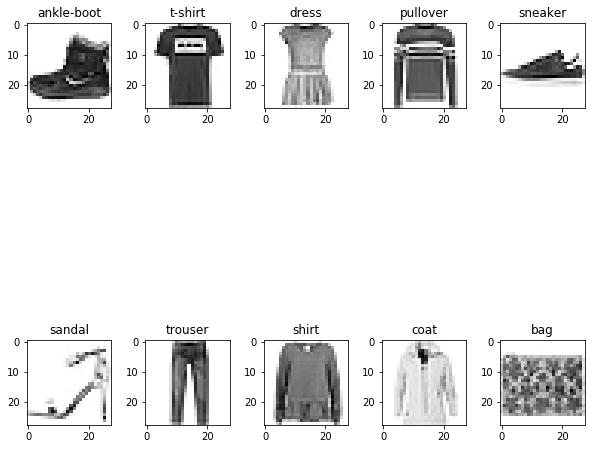

In [0]:
fig=plt.figure(figsize=(10, 10))
plt.subplots_adjust(wspace = 0.4,hspace=0.4)
columns = 5
rows = 2
for i in range(1, columns*rows+1 ):
    img = view[i-1][0]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img,cmap='Greys')
    plt.title(labels[view[i-1][1]])
plt.show()

0 T-shirt/top

1 Trouser

2 Pullover (polerón)

3 Dress

4 Coat

5 Sandal

6 Shirt

7 Sneaker

8 Bag

9 Ankle boot (botín)


### 2.b Posibilidades de preprocesamiento y pequeños análisis. 

¿Cuáles son los rangos de valores de `x`? ¿Por qué?

¿Las distintas clases de ejemplos están balanceadas?

¿Considera necesario realizar un preprocesamiento? Escale los valores de `x` al intervalo $[0,1]$, y guarde el conjunto de datos original de igual manera que el escalado. ¿Se pierde información al realizar este preprocesamiento? 

Las primeras redes que entrenaremos utilizarán arquitecturas _fully connected_, por lo cual también es necesario transformar nuestras imagenes 2-dimensionales a vectores, como muestra el ejemplo de código.

In [0]:
print(np.min(x_train),np.max(x_train))

0 255


(array([6000., 6000., 6000., 6000., 6000., 6000., 6000., 6000., 6000.,
        6000.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

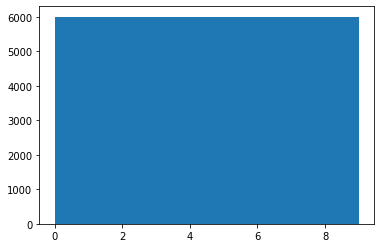

In [0]:
plt.hist(y_train)

In [0]:
x_train_scal = x_train/255
x_val_scal = x_val/255
x_val_vector = x_val.reshape(-1,28*28)
x_val_vector_scal = x_val_scal.reshape(-1,28*28)
x_train_vector = x_train.reshape(-1,28*28)
x_train_vector_scal = x_train_scal.reshape(-1,28*28)


In [0]:
x_val_vector.shape

(10000, 784)

### 2.c Primer Autoencoder

Entrenaremos un primer autoencoder de una capa oculta, usando arquitectura densa. Para esto, utilize como guía los códigos presentados abajo. 

Utilice en primera instancia su conjunto de datos escalados. Considerando el intervalo de los datos escalados, ¿Qué función de activación correspondería a la capa de salida de la red? ¿Debería afectar la elección de la función de activación de la capa oculta? 

Entrene esta primera red utilizando pérdida _binary cross entropy_. Compare luego las imagenes originales con las imagenes reconstruidas, como muestra el código. ¿Qué le parece el desempeño de la red, logra aprender la tarea en su opinion? Grafique como varia la pérdida a lo largo del entrenamiento y visualice algunas imagenes reconstruidas. 

In [0]:
from keras.layers import Dense
from keras.models import Sequential

autoencoder = Sequential()

autoencoder.add(Dense(32,activation='relu')) # encoder
 
autoencoder.add(Dense(28*28,activation='sigmoid')) #decoder

autoencoder.compile(loss='binary_crossentropy', optimizer='sgd')
    
history = autoencoder.fit(x_train_vector_scal,x_train_vector_scal,epochs=50,validation_data=(x_val_vector_scal,x_val_vector_scal))
              






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/50





60000/60000 [==============================] - 15s 248us/step - loss: 0.6908 - val_loss: 0.6860
Epoch 2/50
60000/60000 [==============================] - 5s 87us/step - loss: 0.6698 - val_loss: 0.6412
Epoch 3/50
60000/60000 [==============================] - 5s 88us/step - loss: 0.5926 - val_loss: 0.5502
Epoch 4/50
60000/60000 [==============================] - 5s 87us/step - loss: 0.5320 - val_loss: 0.5221
Epoch 5/50
60000/60000 [==============================] - 5s 89us/step - loss: 0.5176 - val_loss: 0.5149
Epoch 6/50
60000/60000 [==============================] - 6s 94us/step - loss: 0.5121 - val_loss: 0.5103
Epoch 7/50
60000/60000 [==============================] - 6s 94us/step - loss: 0.5076 - val_loss: 0.5057
Epoch 8/50
60000/60000 [==============================] - 5s 89us/step - loss: 0.5026 - val_loss: 0.5002
E

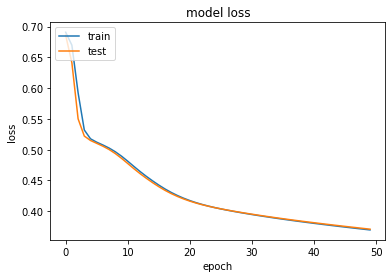

In [0]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

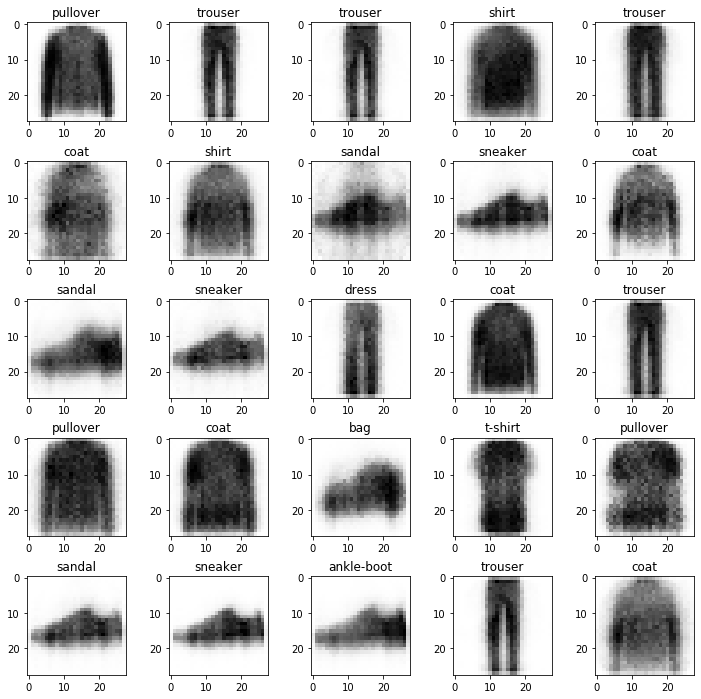

In [0]:
fig=plt.figure(figsize=(12, 12))
plt.subplots_adjust(wspace = 0.4,hspace=0.4)
columns = 5
rows = 5
pred = autoencoder.predict(x_val_vector_scal)
for i in range(1, columns*rows+1 ):
    fig.add_subplot(rows, columns, i)
    plt.imshow(pred[i].reshape(28,28)*255,cmap='Greys')
    plt.title(labels[y_val[i]])
plt.show()


### 2.d Sin escalar
Entrene nuevamente la misma estructura de red pero esta vez utilizando los datos originales (sin escalar). ¿Qué función de activación debe utilizar para la capa de salida? ¿Le parece sea una buena aproximación comparando con las caracteristicas de la red anterior? 

Compare los desempeños viendo las imagenes reconstruidas. 

De aquí en adelante prefiera la versión de los datos escaladas para consistencia. 

In [0]:
autoencoder = Sequential()

autoencoder.add(Dense(32,activation='relu')) # encoder
 
autoencoder.add(Dense(28*28,activation='linear')) #decoder

autoencoder.compile(loss='sm', optimizer='sgd')
    
history = autoencoder.fit(x_train_vector,x_train_vector,epochs=50,validation_data=(x_val_vector,x_val_vector))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 5s 90us/step - loss: -201.8703 - val_loss: -209.8128
Epoch 2/50
60000/60000 [==============================] - 5s 88us/step - loss: -209.5457 - val_loss: -209.8128
Epoch 3/50
60000/60000 [==============================] - 5s 88us/step - loss: -209.5457 - val_loss: -209.8128
Epoch 4/50
60000/60000 [==============================] - 5s 86us/step - loss: -209.5457 - val_loss: -209.8128
Epoch 5/50
60000/60000 [==============================] - 5s 87us/step - loss: -209.5457 - val_loss: -209.8128
Epoch 6/50
60000/60000 [==============================] - 5s 87us/step - loss: -209.5457 - val_loss: -209.8128
Epoch 7/50
60000/60000 [==============================] - 5s 87us/step - loss: -209.5457 - val_loss: -209.8128
Epoch 8/50
60000/60000 [==============================] - 5s 86us/step - loss: -209.5457 - val_loss: -209.8128
Epoch 9/50
60000/60000 [==============================] - 5s 8

KeyboardInterrupt: ignored

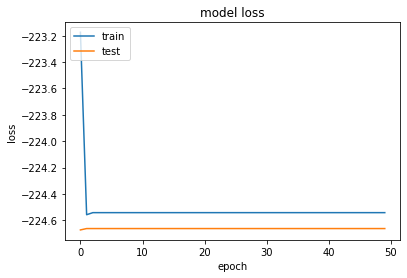

In [0]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

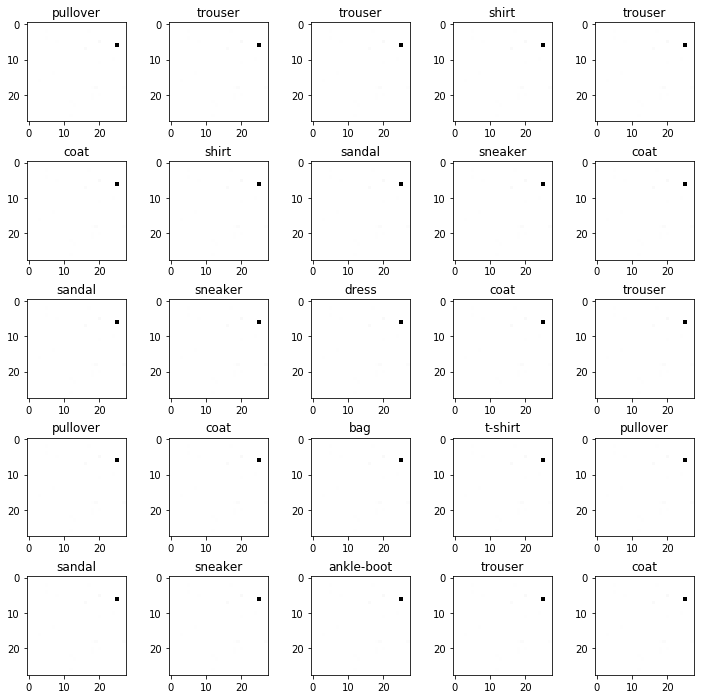

In [0]:
fig=plt.figure(figsize=(12, 12))
plt.subplots_adjust(wspace = 0.4,hspace=0.4)
columns = 5
rows = 5
pred = autoencoder.predict(x_val_vector)
for i in range(1, columns*rows+1 ):
    fig.add_subplot(rows, columns, i)
    plt.imshow(pred[i].reshape(28,28),cmap='Greys')
    plt.title(labels[y_val[i]])
plt.show()

### 2.e Dimensionalidad

Una forma de interpretar lo que realiza el autoencoder, es considerar que si el autoencoder hace bien su tarea, la información necesaria para reconstruir la imagen original se encuentra en la capa oculta, la cual tiene menor dimensionalidad que la imagen original. Uno puede considerar por lo tanto que la capa de _encoding_ esta comprimiendo la información contenida en la imagen, mientras la capa de _decoding_ hace el proceso contrario, descomprimiendola a su estado original lo mejor posible. 

Explore como cambia el desempeño de la red en cuestión frente a cambios en la dimensión de la capa oculta. Pruebe a lo menos 5 niveles de compresión distintos, incluyendo uno donde la capa oculta tenga $50\%$ de ratio de compresión y otro donde la capa oculta tenga tan solo 2 neuronas. ¿Qué observa?

In [0]:
h_neuron = [2,32,64,128,246,x_train[1].size/2,500,600]
hists = list()

for n in h_neuron:
  autoencoder = Sequential()
  autoencoder.add(Dense(n,activation='relu')) # encoder
  autoencoder.add(Dense(28*28,activation='sigmoid')) #decoder
  autoencoder.compile(loss='binary_crossentropy', optimizer='sgd')
  history = autoencoder.fit(x_train_vector_scal,x_train_vector_scal,epochs=50,validation_data=(x_val_vector_scal,x_val_vector_scal))
  hists.append(history)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 6s 98us/step - loss: 0.6915 - val_loss: 0.6892
Epoch 2/50
60000/60000 [==============================] - 6s 93us/step - loss: 0.6819 - val_loss: 0.6681
Epoch 3/50
60000/60000 [==============================] - 5s 92us/step - loss: 0.6303 - val_loss: 0.5837
Epoch 4/50
60000/60000 [==============================] - 6s 93us/step - loss: 0.5504 - val_loss: 0.5304
Epoch 5/50
60000/60000 [==============================] - 6s 93us/step - loss: 0.5236 - val_loss: 0.5200
Epoch 6/50
60000/60000 [==============================] - 6s 94us/step - loss: 0.5176 - val_loss: 0.5163
Epoch 7/50
60000/60000 [==============================] - 6s 92us/step - loss: 0.5148 - val_loss: 0.5142
Epoch 8/50
60000/60000 [==============================] - 6s 96us/step - loss: 0.5129 - val_loss: 0.5125
Epoch 9/50
60000/60000 [==============================] - 5s 90us/step - loss: 0.5114 - val_loss: 0.5112
Epoch

TypeError: ignored

In [0]:
h_neuron = [int(x_train[1].size/2),500,600]

for n in h_neuron:
  autoencoder = Sequential()
  autoencoder.add(Dense(n,activation='relu')) # encoder
  autoencoder.add(Dense(28*28,activation='sigmoid')) #decoder
  autoencoder.compile(loss='binary_crossentropy', optimizer='sgd')
  history = autoencoder.fit(x_train_vector_scal,x_train_vector_scal,epochs=50,validation_data=(x_val_vector_scal,x_val_vector_scal))
  hists.append(history)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 6s 104us/step - loss: 0.6500 - val_loss: 0.5909
Epoch 2/50
60000/60000 [==============================] - 6s 93us/step - loss: 0.5479 - val_loss: 0.5224
Epoch 3/50
60000/60000 [==============================] - 6s 93us/step - loss: 0.5124 - val_loss: 0.5053
Epoch 4/50
60000/60000 [==============================] - 6s 94us/step - loss: 0.4988 - val_loss: 0.4933
Epoch 5/50
60000/60000 [==============================] - 6s 94us/step - loss: 0.4868 - val_loss: 0.4813
Epoch 6/50
60000/60000 [==============================] - 6s 94us/step - loss: 0.4748 - val_loss: 0.4693
Epoch 7/50
60000/60000 [==============================] - 6s 93us/step - loss: 0.4630 - val_loss: 0.4580
Epoch 8/50
60000/60000 [==============================] - 6s 95us/step - loss: 0.4523 - val_loss: 0.4480
Epoch 9/50
60000/60000 [==============================] - 6s 94us/step - loss: 0.4428 - val_loss: 0.4391
Epoc

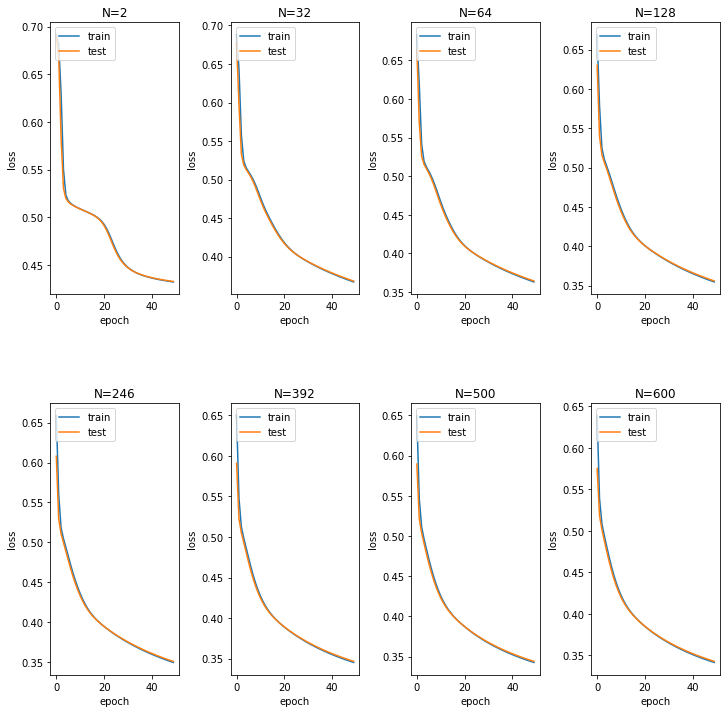

In [0]:
h_neuron = [2,32,64,128,246,int(x_train[1].size/2),500,600]
fig=plt.figure(figsize=(12, 12))
plt.subplots_adjust(wspace = 0.4,hspace=0.4)
columns = 4
rows = 2
for i in range(1, columns*rows+1 ):
    fig.add_subplot(rows, columns, i)
    # summarize history for loss
    history = hists[i-1]
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('N='+str(h_neuron[i-1]))
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
plt.show()

### 2.f Deep autoencoder

Pruebe ahora con una arquitectura ligeramente más profunda. Para esto utilice a lo menos 3 capas de encoding, es decir, 3 capas que progresivamente reduzcan la dimensionalidad de la representación hasta una dimensión objetivo inicialmente igual a la mejor obtenida en la pregunta anterior. Utilice igualmente a lo menos 2 capas de decoding, que se encarguen de aumentar la dimensionaliad de la representación hasta alcanzar la dimensión de la imagen original. Note que las primeras capas no necesariamente deben tener menor dimensionalidad que la imagen, la dimensión relevante es aquella de la última capa de encoding. 

¿Cómo aumenta el número de parámetros entrenables? ¿Aumenta el tamaño de la representación "comprimida"?

Una vez esté satisfecho con su arquitectura profunda, varíe la dimensión objetivo de la última capa de encoding, realizando una exploración similar a la pregunta anterior. 

¿Puede obtener una representación de menor dimensionalidad que la encontrada en el item anterior sin perder calidad en las imagenes obtenidas?

Utilice gráficos y muestre algunas imágenes reconstruidas para complementar sus comentarios. 


In [0]:
h_neuron = [2,32,64,128,246,int(x_train[1].size/2),500,600]
hists = list()

for n in h_neuron:
  autoencoder = Sequential()
  autoencoder.add(Dense(500,activation='relu')) # encoder
  autoencoder.add(Dense(400,activation='relu')) # encoder
  autoencoder.add(Dense(n,activation='relu')) # encoder
  autoencoder.add(Dense(400,activation='relu')) #decoder
  autoencoder.add(Dense(28*28,activation='sigmoid')) #decoder
  autoencoder.compile(loss='binary_crossentropy', optimizer='sgd')
  history = autoencoder.fit(x_train_vector_scal,x_train_vector_scal,epochs=50,validation_data=(x_val_vector_scal,x_val_vector_scal))
  hists.append(history)






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/50





60000/60000 [==============================] - 16s 262us/step - loss: 0.6916 - val_loss: 0.6898
Epoch 2/50
60000/60000 [==============================] - 6s 108us/step - loss: 0.6840 - val_loss: 0.6696
Epoch 3/50
60000/60000 [==============================] - 6s 104us/step - loss: 0.5954 - val_loss: 0.5250
Epoch 4/50
60000/60000 [==============================] - 6s 105us/step - loss: 0.5136 - val_loss: 0.5085
Epoch 5/50
60000/60000 [==============================] - 6s 103us/step - loss: 0.5045 - val_loss: 0.5015
Epoch 6/50
60000/60000 [==============================] - 6s 101us/step - loss: 0.4973 - val_loss: 0.4943
Epoch 7/50
60000/60000 [==============================] - 6s 103us/step - loss: 0.4903 - val_loss: 0.4882
Epoch 8/50
60000/60000 [==============================] - 6s 104us/step - loss: 0.4852 - val_loss: 0

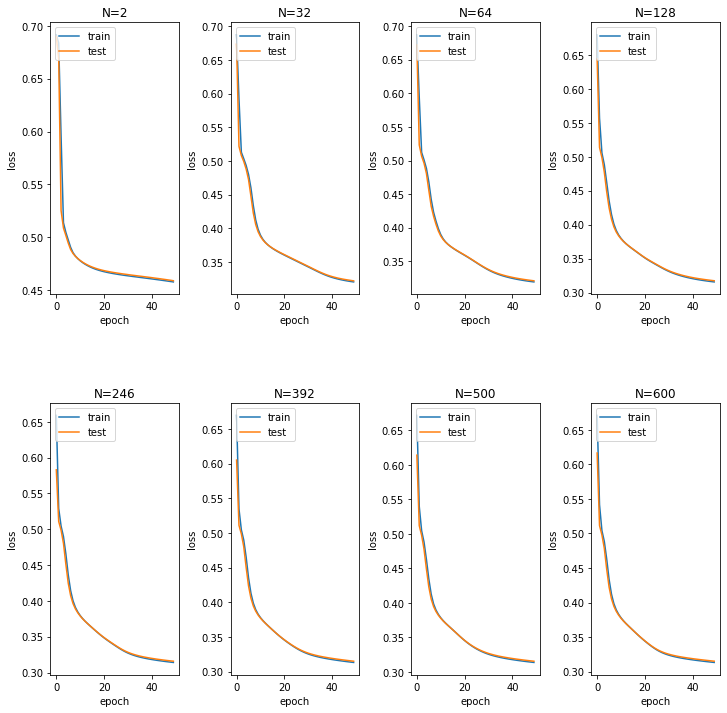

In [0]:
h_neuron = [2,32,64,128,246,int(x_train[1].size/2),500,600]
fig=plt.figure(figsize=(12, 12))
plt.subplots_adjust(wspace = 0.4,hspace=0.4)
columns = 4
rows = 2
for i in range(1, columns*rows+1 ):
    fig.add_subplot(rows, columns, i)
    # summarize history for loss
    history = hists[i-1]
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('N='+str(h_neuron[i-1]))
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
plt.show()

### 2.g Convolutional Autoencoder

Como hemos hasta ahora  utilizado una arquitectura fully connected, nuestra red no toma en cuenta la infomación local contenida en la proximidad de un pixel en la imagen. Como vimos en la tarea anterior, esta información podría ser crucial al momento de procesar imágenes. 

En este item deberá implementar un autoencoder convolucional. La sección de encoding de la red se creará de igual manera que las redes convolucionales creadas en la tarea 1. Puede utilizar capas de Max Pooling o Strides mayores a 1 para reducir la dimensionalidad en esta etapa. Tenga en mente como varía la dimensión de la imagen a lo largo del proceso. 

Para luego recuperar la dimensionalidad de la imagen original debemos utilizar una capa llamada usualmente como "Deconvolution Layer". Esta capa realiza el proceso inverso que aquel realizado por una capa convolucional, por lo cual utilizando por ejemplo `stride=2` puede duplicar la dimensionalidad de su input. 

Puede realizar la profundidad que desee, pero tome en cuenta que una mayor profundidad de la sección convolucional permite a la red reducir dimensionalidad más lentamente, sin "forzar" la compresión de las características. Note que para reconstruir la dimensión original puede usar `output_padding` para corregir problemas de paridad, entre otros. 

Puede igualmente optar por usar algun número de capas densas en el cuello de botella del autoencoder, usando al comienzo de esta una capa `Flatten` y al final de ella una capa `Reshape` (`keras.layers.Reshape(target_shape)`) para recuperar la bidimensionalidad.

¡No olvide que para entrenar esta red debe usar la versión bidimensional de los datos escalados!

Visualice que tan bien se comporta la convolución, en terminos de la función de pérdida y visualizando las imagenes reconstruidas. Compárese con la red densa. 

https://ramhiser.com/post/2018-05-14-autoencoders-with-keras/

In [0]:
autoencoder_conv = Sequential()

# Encoder Layers
autoencoder_conv.add(Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(28,28,1)))
autoencoder_conv.add(MaxPooling2D((2, 2), padding='same'))
autoencoder_conv.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
autoencoder_conv.add(MaxPooling2D((2, 2), padding='same'))
autoencoder_conv.add(Conv2D(8, (3, 3), strides=(2,2), activation='relu', padding='same'))

# Flatten encoding for visualization
autoencoder_conv.add(Flatten())
autoencoder_conv.add(Reshape((4, 4, 8)))

# Decoder Layers
autoencoder_conv.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
autoencoder_conv.add(UpSampling2D((2, 2)))


autoencoder_conv.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
autoencoder_conv.add(UpSampling2D((2, 2)))
autoencoder_conv.add(Conv2D(16, (3, 3), activation='relu'))
autoencoder_conv.add(UpSampling2D((2, 2)))
autoencoder_conv.add(Conv2D(1, (3, 3), activation='sigmoid', padding='same'))

#autoencoder_conv.add(Deconvolution2D(64, 2, strides=2,activation='relu', padding='same'))
# autoencoder_conv.add(Deconvolution2D(1, 2, strides=2,activation='sigmoid', padding='same'))

autoencoder_conv.summary()

autoencoder_conv.compile(loss='binary_crossentropy', optimizer='sgd')    
x_tr = x_train_scal.reshape(len(x_train_scal),28,28,1)
x_val = x_val_scal.reshape(len(x_val_scal),28,28,1)
history = autoencoder_conv.fit(x_tr, x_tr, epochs=50,validation_data=(x_val,x_val))


Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_71 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 4, 4, 8)           584       
_________________________________________________________________
flatten_11 (Flatten)         (None, 128)               0         
_________________________________________________________________
reshape_10 (Reshape)         (None, 4, 4, 8)         

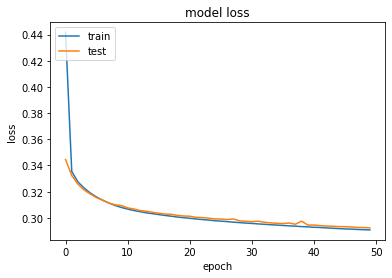

In [0]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

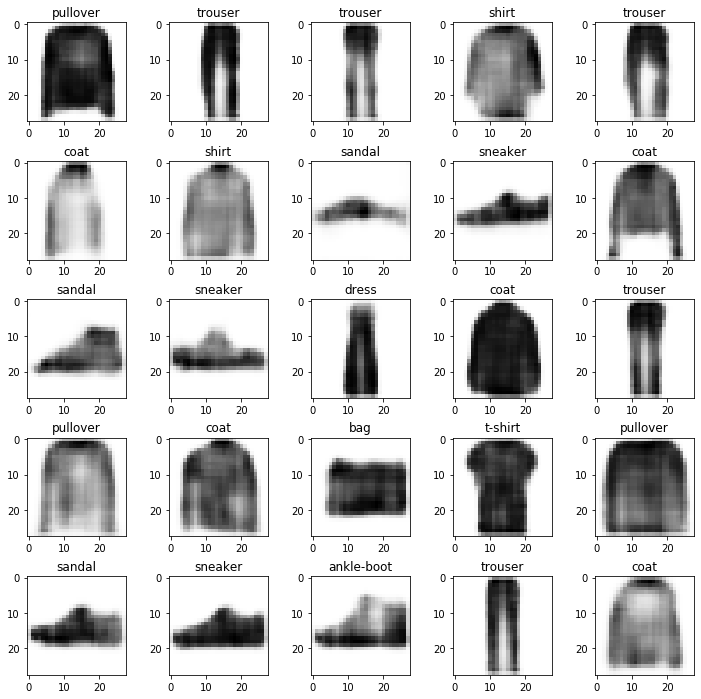

In [0]:
fig=plt.figure(figsize=(12, 12))
plt.subplots_adjust(wspace = 0.4,hspace=0.4)
columns = 5
rows = 5
pred = autoencoder_conv.predict(x_val)
for i in range(1, columns*rows+1 ):
    fig.add_subplot(rows, columns, i)
    plt.imshow(pred[i].reshape(28,28)*255,cmap='Greys')
    plt.title(labels[y_val[i]])
plt.show()

### 2.h Transfer Learning y reducción de dimensionalidad

Como mencionamos inicialmente, una de las utilidades de los autoencoders corresponde a la no necesidad de tener etiquetas. En ese caso, podemos utilizar los autoencoders para extraer representaciones significativas de los ejemplos no etiquetados, y luego utilizar ese conocimiento para mejorar el desempeño de nuestros algoritmos. 

Para simular esta tarea supongamos que tenemos la misma base de datos original, sin embargo solo poseemos un pequeño porcentaje de las etiquetas del conjunto de entrenamiento, menos del $5\%$ (considere que si tuviera que etiquetar manualmente incluso solo un $5\%$ correspondería a 3000 imagenes por etiquetar!).

Seleccione un subconjunto de datos correspondiente a menos del $5\%$ de los datos y entrene un modelo predictivo para el problema de clasificación. Si bien la aproximación convolucional suele ser la mejor para este tipo de bases de datos, utilice arquitectura densa. 

Luego, utilizando el mejor autoencoder entrenado hasta ahora (o entrene uno nuevo si prefiere), utilize lo aprendido por la red sobre el conjunto de datos sin etiquetas para intentar aprender la relación suyaciente. Para esto, lo más fácil es primero preprocesar el conjunto `x` de entrenamiento, utilizando la sección de encoding de su autoencoder. Puede crear un nuevo modelo secuencial solo con las capas de encoding como se muestra en el código y luego usar el método `.predict` del modelo. Luego sobre estos datos preprocesados entrene un nuevo modelo predictivo fully connected. 

La otra opción sería crear un modelo cuya primeras capas correspondan a la sección de encoding del autoencoder y las últimas capas a su modelo denso, pero fijando el atributo `trainable` de las primeras capas como `False`, sin embargo esto resulta poco eficiente. 


Comente sus resultados basándose en métricas adecuadas. Comente igualmente sobre la dimensionalidad de las representaciones utilizadas por cada uno de los dos modelos entrenados en esta sección y el número de parametros _entrenables_ y totales del modelo (considerando el encoding). 

Considerando la dimensionalidad obtenida por el encoder, compare la calidad de la representación obtenida por el autoencoder frente a otras aproximaciones de reducción de dimensionalidad, como por ejemplo Principal Component Analysis (PCA). Para esto, transforme los datos de entrenamiento utilizando PCA con un número de componentes principales igual a la dimensión de la representación engendrada por su encoder. Compare el desempeño de un modelo determinado utilizando ambas representaciones. 

Comente sus resultados.

In [0]:
from sklearn.model_selection import train_test_split

x_tr, x_lab, y_tr, y_lab = train_test_split(x_train, y_train, test_size=0.04, random_state=42)
x_tr = x_tr/255
x_lab = x_lab/255

In [0]:
x_lab.shape

(2400, 28, 28)

In [0]:
encoder = Sequential()
d = 128
best_autoencoder = autoencoder_conv
encoder.add(best_autoencoder.get_layer(index=0))
encoder.add(best_autoencoder.get_layer(index=1))
encoder.add(best_autoencoder.get_layer(index=2))
encoder.add(best_autoencoder.get_layer(index=3))
encoder.add(best_autoencoder.get_layer(index=4))
encoder.add(best_autoencoder.get_layer(index=5))
encoder.summary()
    
from sklearn.decomposition import PCA

pca = PCA(n_components=d)
x_pca = pca.fit_transform(x_lab.reshape(-1,28*28))
print(x_pca.shape)

x_lab = x_lab.reshape(len(x_lab),28,28,1)
x_emb = encoder.predict(x_lab)    
print(x_emb.shape)

hists = list()

for x in [x_pca,x_emb]:
  X_train, X_test, y_train, y_test = train_test_split(x, y_lab, test_size=0.33, random_state=42)

  
  

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_71 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 4, 4, 8)           584       
_________________________________________________________________
flatten_11 (Flatten)         (None, 128)               0         
Total params: 1,904
Trainable params: 1,904
Non-trainable params: 0
___________________________________________________

Train on 1608 samples, validate on 792 samples
Epoch 1/30
1608/1608 [==============================] - 1s 780us/step - loss: 2.1347 - acc: 0.2537 - val_loss: 1.4286 - val_acc: 0.6199
Epoch 2/30
1608/1608 [==============================] - 0s 25us/step - loss: 1.5235 - acc: 0.4596 - val_loss: 1.0481 - val_acc: 0.6806
Epoch 3/30
1608/1608 [==============================] - 0s 22us/step - loss: 1.2656 - acc: 0.5479 - val_loss: 0.8786 - val_acc: 0.7121
Epoch 4/30
1608/1608 [==============================] - 0s 22us/step - loss: 1.1294 - acc: 0.5951 - val_loss: 0.7485 - val_acc: 0.7449
Epoch 5/30
1608/1608 [==============================] - 0s 24us/step - loss: 0.9903 - acc: 0.6561 - val_loss: 0.7144 - val_acc: 0.7563
Epoch 6/30
1608/1608 [==============================] - 0s 22us/step - loss: 0.9439 - acc: 0.6561 - val_loss: 0.6548 - val_acc: 0.7664
Epoch 7/30
1608/1608 [==============================] - 0s 22us/step - loss: 0.8487 - acc: 0.6978 - val_loss: 0.6205 - val_acc: 0.7677
Epoch 8

Text(0.5, 1.0, 'Accuracy Curves')

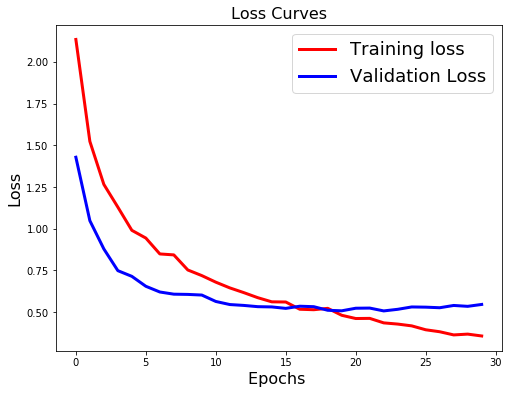

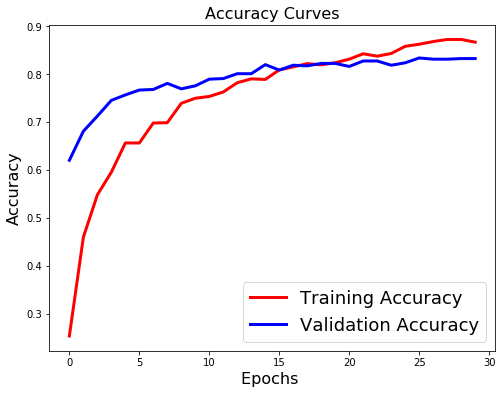

In [0]:
from keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(x_pca, y_lab, test_size=0.33, random_state=42)

classes = np.unique(y_lab) #CHecks for unique labels in the traning labels 
nClasses = len(classes) #length of the output

# Change the labels from integer to categorical data
train_labels_one_hot = to_categorical(y_train)
test_labels_one_hot = to_categorical(y_test)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(128,))) # 1st hidden layer
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu')) # 2nd hidden layer
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu')) # 2nd hidden layer
model.add(Dropout(0.5))
model.add(Dense(nClasses, activation='softmax')) #softmax for multi class classification
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, train_labels_one_hot, batch_size=256, epochs=30, verbose=1, validation_data=(X_test, test_labels_one_hot))

[test_loss, test_acc] = model.evaluate(X_test, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

Train on 1608 samples, validate on 792 samples
Epoch 1/50
1608/1608 [==============================] - 1s 908us/step - loss: 2.4189 - acc: 0.1604 - val_loss: 1.7760 - val_acc: 0.3598
Epoch 2/50
1608/1608 [==============================] - 0s 30us/step - loss: 1.8320 - acc: 0.3116 - val_loss: 1.3847 - val_acc: 0.5467
Epoch 3/50
1608/1608 [==============================] - 0s 24us/step - loss: 1.5616 - acc: 0.3993 - val_loss: 1.2066 - val_acc: 0.5833
Epoch 4/50
1608/1608 [==============================] - 0s 26us/step - loss: 1.4196 - acc: 0.4422 - val_loss: 1.0840 - val_acc: 0.5657
Epoch 5/50
1608/1608 [==============================] - 0s 33us/step - loss: 1.3408 - acc: 0.4801 - val_loss: 1.0410 - val_acc: 0.5871
Epoch 6/50
1608/1608 [==============================] - 0s 31us/step - loss: 1.2431 - acc: 0.4932 - val_loss: 0.9457 - val_acc: 0.6149
Epoch 7/50
1608/1608 [==============================] - 0s 24us/step - loss: 1.1922 - acc: 0.5404 - val_loss: 0.9094 - val_acc: 0.6035
Epoch 8

Text(0.5, 1.0, 'Accuracy Curves')

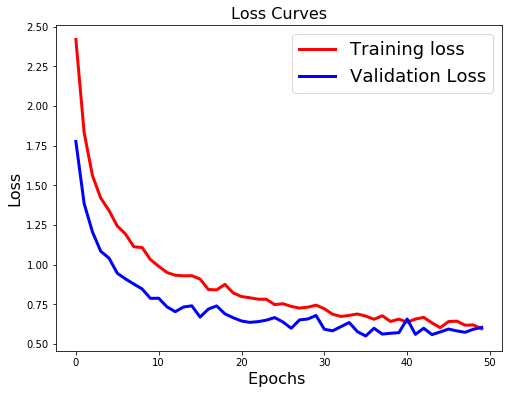

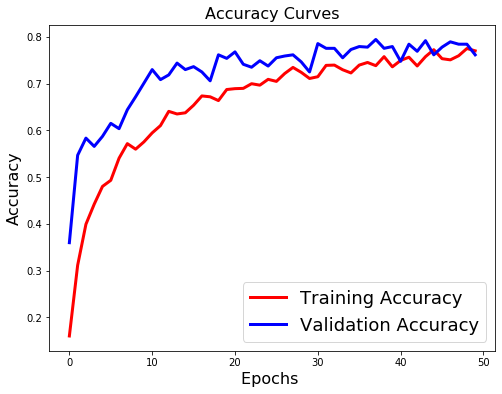

In [0]:
from keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(x_emb, y_lab, test_size=0.33, random_state=42)

classes = np.unique(y_lab) #CHecks for unique labels in the traning labels 
nClasses = len(classes) #length of the output

# Change the labels from integer to categorical data
train_labels_one_hot = to_categorical(y_train)
test_labels_one_hot = to_categorical(y_test)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(128,))) # 1st hidden layer
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu')) # 2nd hidden layer
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu')) # 2nd hidden layer
model.add(Dropout(0.5))
model.add(Dense(nClasses, activation='softmax')) #softmax for multi class classification
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, train_labels_one_hot, batch_size=256, epochs=50, verbose=1, validation_data=(X_test, test_labels_one_hot))

[test_loss, test_acc] = model.evaluate(X_test, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

### 2.i Denoising Autoencoder 

Otra utilidad que se le ha dado a los autoencoders es la posibilidad de utilizarlos para separar ruido de información. Para entrenar tal tipo de modelo, la idea es simple: utilizar como datos de entrada imagenes a las cuales se les ha agregado artificialmente ruido y como objetivo la imagen original sin ruido. 

Entrene alguna arquitectura de autoencoder que le parezca apropiada para la tarea utilizando algún tipo de ruido aleatorio. Puede utilizar cambios en valores de pixeles aleatoriamente, o por ejemplo "promediar" ponderadamente la imagen original con alguna otra imagen del dataset ligeramente modificada. Puede utilizar las librerías `random` de `numpy` o utilizar por ejemplo el `ImageDataGenerator` que utilizamos en la tarea anterior para generar imágenes similares con las cuales "sumar" ruido. Sea creativo, puede crear el ruido que desee. Idealmente, considerando la naturaleza del problema que se buscaría modelar (eliminar ruido real de mediciones), la naturaleza del ruido agregado debe ser estocástica y no puede "repetirse" el mismo patron de ruido a lo largo de todo el entrenamiendo, es decir, si agregó un ruido estocástico a cada imagen del conjunto, este proceso debe iterarse igualmente luego de cada época de entrenamiento, para evitar que la red aprenda un patrón especifico de ruido, si no aprenda realmente a diferenciar ruido sin información de la información suyaciente a la imagen. 

Una vez esté satisfecho con la red, muestre ejemplos de la imagen con ruido, la imagen original y la imagen reconstruida. Pruebe igualmente entregarle a la red nuevas.

In [0]:
# Save augmented images to file
from keras.preprocessing.image import ImageDataGenerator
import os

# load data
(x_train,y_train),(x_val,y_val) = fashion_mnist.load_data()

x_train_scal = x_train/255
x_val_scal = x_val/255
x_val_vector = x_val.reshape(-1,28*28)
x_val_vector_scal = x_val_scal.reshape(-1,28*28)
x_train_vector = x_train.reshape(-1,28*28)
x_train_vector_scal = x_train_scal.reshape(-1,28*28)

x_tr = x_train_scal.reshape(len(x_train_scal),28,28,1)
x_val = x_val_scal.reshape(len(x_val_scal),28,28,1)

datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(x_tr)

autoencoder_conv = Sequential()

# Encoder Layers
autoencoder_conv.add(Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(28,28,1)))
autoencoder_conv.add(MaxPooling2D((2, 2), padding='same'))
autoencoder_conv.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
autoencoder_conv.add(MaxPooling2D((2, 2), padding='same'))
autoencoder_conv.add(Conv2D(8, (3, 3), strides=(2,2), activation='relu', padding='same'))

# Flatten encoding for visualization
autoencoder_conv.add(Flatten())
autoencoder_conv.add(Reshape((4, 4, 8)))

# Decoder Layers
autoencoder_conv.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
autoencoder_conv.add(UpSampling2D((2, 2)))


autoencoder_conv.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
autoencoder_conv.add(UpSampling2D((2, 2)))
autoencoder_conv.add(Conv2D(16, (3, 3), activation='relu'))
autoencoder_conv.add(UpSampling2D((2, 2)))
autoencoder_conv.add(Conv2D(1, (3, 3), activation='sigmoid', padding='same'))

autoencoder_conv.summary()

autoencoder_conv.compile(loss='binary_crossentropy', optimizer='rmsprop')    
#history = autoencoder_conv.fit(x_tr, x_tr, epochs=50,validation_data=(x_val,x_val))

# fits the model on batches with real-time data augmentation:
history = autoencoder_conv.fit_generator(datagen.flow(x_tr, x_tr, batch_size=32), steps_per_epoch=len(x_train) / 32, epochs=20,validation_data=(x_val,x_val))

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 4, 4, 8)           584       
_________________________________________________________________
flatten_8 (Flatten)          (None, 128)               0         
_________________________________________________________________
reshape_8 (Reshape)          (None, 4, 4, 8)          

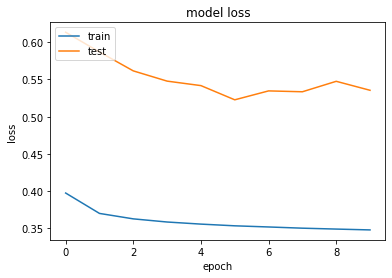

In [0]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

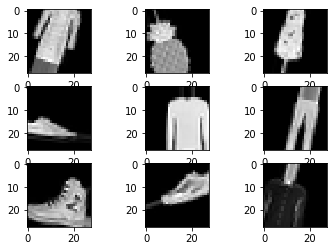

In [0]:
# Datagen
for X_batch, y_batch in datagen.flow(x_tr, y_train, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		plt.subplot(330 + 1 + i)
		plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
	# show the plot
	plt.show()
	break

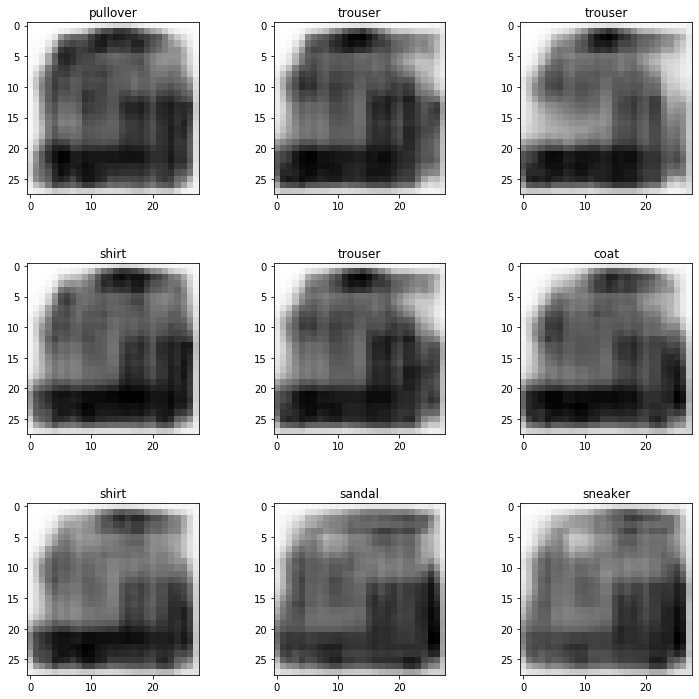

****************************************************


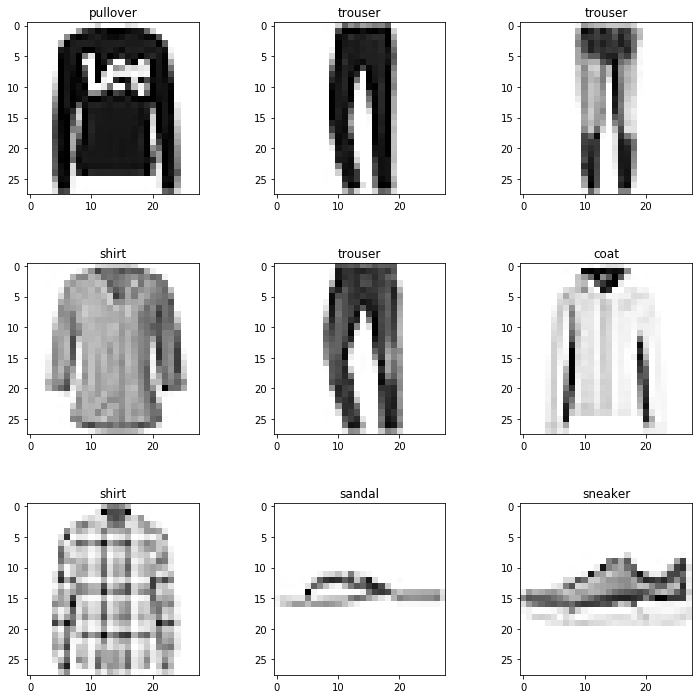

In [0]:
# predict
fig=plt.figure(figsize=(12, 12))
plt.subplots_adjust(wspace = 0.4,hspace=0.4)
columns = 3
rows = 3
pred = autoencoder_conv.predict(x_val)
for i in range(1, columns*rows+1 ):
    fig.add_subplot(rows, columns, i)
    plt.imshow(pred[i].reshape(28,28)*255,cmap='Greys')
    plt.title(labels[y_val[i]])
plt.show()

print('****************************************************')

# original
fig=plt.figure(figsize=(12, 12))
plt.subplots_adjust(wspace = 0.4,hspace=0.4)
columns = 3
rows = 3
for i in range(1, columns*rows+1 ):
    fig.add_subplot(rows, columns, i)
    plt.imshow(x_val[i].reshape(28,28)*255,cmap='Greys')
    plt.title(labels[y_val[i]])
plt.show()

### 2.j Generación de imágenes

Otra utilización posible que podría darse, quizás, a los autoencoders, es utilizar los decoders para generar nuevas imagenes. La idea de esto sería considerar que la habilidad que tiene la sección decoder de generar una imagen a partir de una representación de menor dimensionalidad puede aprovecharse. 

Para esto, extraiga la sección de encoding y la sección de decoding de alguno de los autoencoders entrenados que prefiera. Obtenga los valores de la representación interna de las imagenes usando el encoder para calcularlos. Luego agréguele a esta representación algún ruido de su preferencia, y calcule la imagen resultante utilizando el decoder. ¿Qué observa? Muestre las imagenes obtenidas junto con otras imagenes de la misma categoría que la imagen que utilizó originalmente. Preube con distintos valores de ruido.

Pruebe también, por ejemplo, calcular la imagen obtenida al promediar las representaciones comprimidas de varias (o todas) las imagenes de una clase. Utilice el encoder para generar imagenes a partir de otros valores que se les ocurran y especule sobre el por qué la imagen obtenida se asimila o no a las imagenes del dataset. 

In [0]:
autoencoder_conv = Sequential()

# Encoder Layers
autoencoder_conv.add(Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(28,28,1)))
autoencoder_conv.add(MaxPooling2D((2, 2), padding='same'))
autoencoder_conv.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
autoencoder_conv.add(MaxPooling2D((2, 2), padding='same'))
autoencoder_conv.add(Conv2D(8, (3, 3), strides=(2,2), activation='relu', padding='same'))

# Flatten encoding for visualization
autoencoder_conv.add(Flatten())
autoencoder_conv.add(Reshape((4, 4, 8)))

# Decoder Layers
autoencoder_conv.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
autoencoder_conv.add(UpSampling2D((2, 2)))


autoencoder_conv.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
autoencoder_conv.add(UpSampling2D((2, 2)))
autoencoder_conv.add(Conv2D(16, (3, 3), activation='relu'))
autoencoder_conv.add(UpSampling2D((2, 2)))
autoencoder_conv.add(Conv2D(1, (3, 3), activation='sigmoid', padding='same'))

#autoencoder_conv.add(Deconvolution2D(64, 2, strides=2,activation='relu', padding='same'))
# autoencoder_conv.add(Deconvolution2D(1, 2, strides=2,activation='sigmoid', padding='same'))

autoencoder_conv.summary()

autoencoder_conv.compile(loss='binary_crossentropy', optimizer='sgd')    
x_tr = x_train_scal.reshape(len(x_train_scal),28,28,1)
x_val = x_val_scal.reshape(len(x_val_scal),28,28,1)
history = autoencoder_conv.fit(x_tr, x_tr, epochs=50,validation_data=(x_val,x_val))

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_50 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 4, 4, 8)           584       
_________________________________________________________________
flatten_10 (Flatten)         (None, 128)               0         
_________________________________________________________________
reshape_10 (Reshape)         (None, 4, 4, 8)         

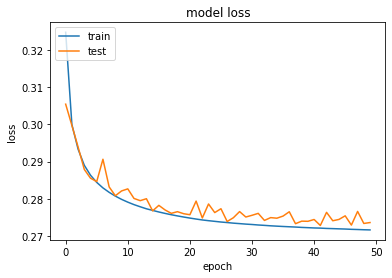

In [0]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

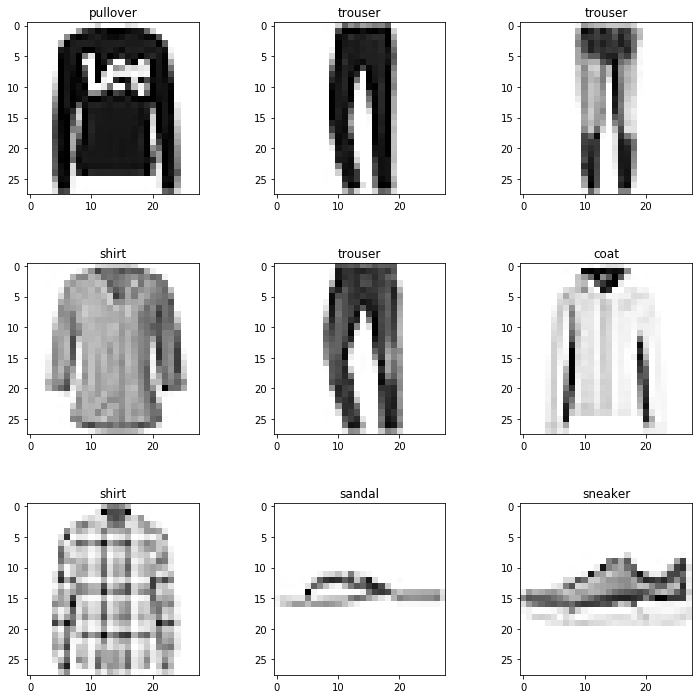

 DATA GEN 


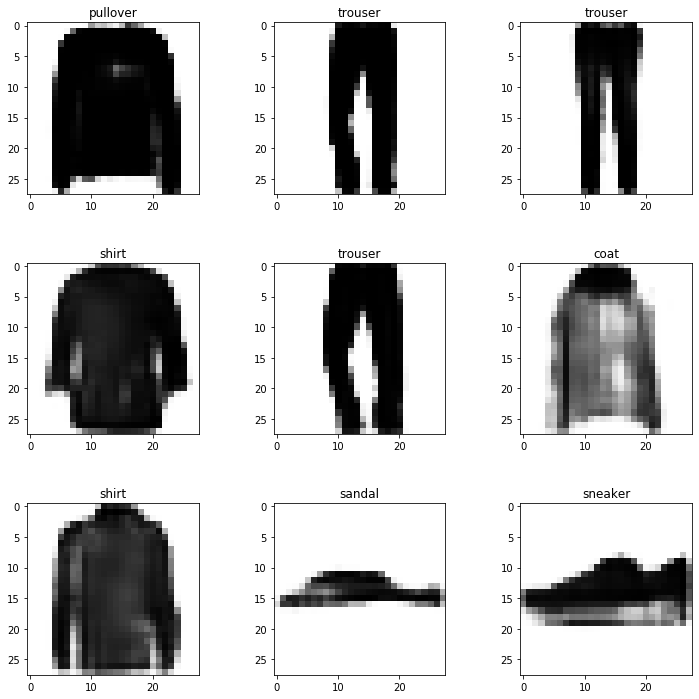

In [0]:
# do it yourself
encoder = Sequential()
best_autoencoder = autoencoder_conv
encoder.add(best_autoencoder.get_layer(index=0))
encoder.add(best_autoencoder.get_layer(index=1))
encoder.add(best_autoencoder.get_layer(index=2))
encoder.add(best_autoencoder.get_layer(index=3))
encoder.add(best_autoencoder.get_layer(index=4))
encoder.add(best_autoencoder.get_layer(index=5))

x_val = x_val_scal.reshape(len(x_val_scal),28,28,1)
pred = encoder.predict(x_val)

# noise apply to data
noise = np.random.normal(0,0.1,pred.shape)
noise_data = pred*2

decoder = Sequential()
decoder.add(best_autoencoder.get_layer(index=6))
decoder.add(best_autoencoder.get_layer(index=7))
decoder.add(best_autoencoder.get_layer(index=8))
decoder.add(best_autoencoder.get_layer(index=9))
decoder.add(best_autoencoder.get_layer(index=10))
decoder.add(best_autoencoder.get_layer(index=11))
decoder.add(best_autoencoder.get_layer(index=12))
decoder.add(best_autoencoder.get_layer(index=13))

gen = decoder.predict(noise_data)

# original
fig=plt.figure(figsize=(12, 12))
plt.subplots_adjust(wspace = 0.4,hspace=0.4)
columns = 3
rows = 3
for i in range(1, columns*rows+1 ):
    fig.add_subplot(rows, columns, i)
    plt.imshow(x_val[i].reshape(28,28)*255,cmap='Greys')
    plt.title(labels[y_val[i]])
plt.show()

print(' DATA GEN ')

# original
fig=plt.figure(figsize=(12, 12))
plt.subplots_adjust(wspace = 0.4,hspace=0.4)
columns = 3
rows = 3
for i in range(1, columns*rows+1 ):
    fig.add_subplot(rows, columns, i)
    plt.imshow(gen[i].reshape(28,28)*255,cmap='Greys')
    plt.title(labels[y_val[i]])
plt.show()

# 3 - GAN para MNIST 

Probablemente uno de los desarrollos recientes del area de las redes neuronales más interesantes son las GAN, o _Generative Adversarial Networks_. Estas han deslumbrado al mundo los últimos años generando resultados inesperados, como los llamados _deep fakes_ (https://www.youtube.com/watch?v=dh-QM54RuAs), caras no no existentes generadas artificialmente, entre muchas otras aplicaciones de las cuales las más creativas y divertidas son ampliamente divulgadas. Estos resultados nos dan cuenta que estas redes cuando son implementadas correctamente tienen la habilidad de realizar tareas muy especificas logrando desempeños que en logran incluso en algunos casos engañar a observadores humanos.

<img src="https://pathmind.com/images/wiki/GANs.png" background="white">

Dependiendo del problema que uno quiera resolver las GAN no requieren datos etiquetados. Esto lo logran gracias a su estructura adversarial, es decir, donde simultaneamente se entrenan dos redes, una especializada en generar datos y otra red especializada en discriminar datos verdaderos de datos falsos, en su configuración más simple al menos. En esta parte de la tarea deberan generar una red de este tipo que genere dígitos que aparenten ser hechos a mano. Para esto utilizaremos las imagenes de entrenamiento del dataset MNIST que ya conocen.

A diferencia de otras preguntas, en esta deberán tener mayor iniciativa propia y solamente se presentará una estructura básica la cual ustedes deberán completar y ajustar para que el entrenamiento se realice bien. Además deberán:

* Graficar alguna medida del desempeño tanto del generador como del disciminador (por ejemplo f1-score, precision and recall o accuracy) a lo largo del entrenamiento. ¿Variaciones en esta medidas representan mejoras en nuestra red?
* Visualizar imagenes generadas por el generador a lo largo del entrenamiento y ver su evolución (idealmente graficar epocas representativas de etapas del entrenamiento)
* Explicar el comportamiento de la evolución de ambos desempeños y por qué no necesariamente esos valores representan que la red alcance su cometido
* Describir, teórica o práctiamente, que ocurriría si la red generadora no pudiera por algún motivo (divergencia en entrenamiento, excesivo _underfitting_, etc) generar imágenes razonables.
* Describir la contraparte de lo que ocurriría si la red discriminadora no pudiera aprender a diferenciar imagenes reales de ruido aleatorio.
* Una vez teniendo una red entrenada a completitud, muestre varias imagenes generadas. ¿Se logra obtener imagenes convincentes?
* Igualmente con la red entrenada, guarde el ruido aleatorio que origina dos números reconocibles distintos. ¿Qué ocurre si vemos las imagenes generadas por el generador al entregarle puntos distribuidos linealmente entre los dos puntos?
* Proponga o investigue como realizaría las siguientes tareas:
    * A partir de una base de datos de imagenes RGB, entrenar una GAN que genere imágenes a color convincentes a partir de imagenes en blanco y negro, es decir que deduzca el color a partir de imagenes en blanco y negro.
    * A partir de una base de datos de cuadros de paisajes reales y las fotos correspondientes al cuadro, entrenar una GAN que permita transformar fotografias a cuadros y viceversa (puede utilizar más de 2 redes)
    * Proponga un problema que les parezca interesante y una estructura de GAN que le permitiría resolverlo
    
Esta pregunta si bien es libre, debe ser redactada de manera ordenada. La recomendación es separar tanto el código como las respuestas en varios bloques, y enunciar nuevamente las preguntas o redactar sus respuestas de manera que no quede duda a qué pregunta en particular estan respondiendo. El código de abajo está incompleto y es solo una guía (de todas formas la estructura y entrenamiento de la red "funciona", aunque se recomienda prueben pequeños cambios), puede crear funciones, cambiar nombres e incluso las redes mismas como estimen conveniente, la intención es que se aproximen a la exploración que deberán hacer si alguna vez les toca resolver un problema real con ANN y luego reportar sus resultados. 

<!-- glhf -->

In [0]:
from keras.layers import Dense, BatchNormalization, LeakyReLU, Reshape, Dropout, Conv2D, UpSampling2D, Activation, Flatten
import numpy as np
from keras.models import Sequential
from keras.optimizers import RMSprop, Adam, SGD

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.layers import Dense, Dropout, Input
from keras.models import Model,Sequential
from keras.datasets import mnist
from tqdm import tqdm
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import Adam

## Cargamos los datos y escalamos al intervalo [0,1]

In [3]:
from keras.datasets import mnist

#(x,_),(_,_) = mnist.load_data()
#x = x.reshape((-1,28,28,1)).astype(np.float32)
#x = x/255

def load_data():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train = (x_train.astype(np.float32) - 127.5)/127.5
    
    # convert shape of x_train from (60000, 28, 28) to (60000, 784) 
    # 784 columns per row
    #x_train = x_train.reshape(60000, 784)
    return (x_train, y_train, x_test, y_test)

(X_train, y_train,X_test, y_test)=load_data()
print(X_train.shape)

(60000, 28, 28)


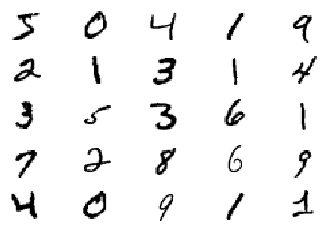

In [10]:
# plot images from the training dataset
for i in range(25):
	# define subplot
	plt.subplot(5, 5, 1 + i)
	# turn off axis
	plt.axis('off')
	# plot raw pixel data
	plt.imshow(X_train[i], cmap='gray_r')
plt.show()

Tenemos entonces que:
* Input son imagenes de (28, 28)
* Output la probabilidad de que la imagen sea real o falsa, por lo tanto es clasificación binaria

El modelo discriminador tiene dos capas convolucionales con 64 filtros cada una, un tamaño de kernel pequeño de 3, y una stride de 2. El modelo no tiene capas de pooling y un único nodo en la capa de salida con la función de activación sigmoide para predecir si la muestra de entrada es real o falsa. El modelo está entrenado para minimizar la función de pérdida de entropía cruzada binaria, apropiada para la clasificación binaria.

## Métricas de desempeño

In [0]:
from keras import backend as K

def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives)
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives)
        return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall))

## Definimos el discriminador

In [33]:
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LeakyReLU
from keras.utils.vis_utils import plot_model

# definir el modelo discriminador
def define_discriminator(in_shape=(28,28,1)):
	model = Sequential()
	model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same', input_shape=in_shape))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Dropout(0.4))
	model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Dropout(0.4))
	model.add(Flatten())
	model.add(Dense(1, activation='sigmoid'))
	# compilar el modelo
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy', recall_m, precision_m, f1_m])
	return model

# definir el modelo
model = define_discriminator()
# sumario del modelo
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 14, 14, 64)        640       
_________________________________________________________________
leaky_re_lu_17 (LeakyReLU)   (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 7, 7, 64)          36928     
_________________________________________________________________
leaky_re_lu_18 (LeakyReLU)   (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 3136)             

In [35]:
def load_real_samples():
  # pasar de 2 dimensiones a 3 para poder usar las capas convolucionales
  X = np.expand_dims(X_train, axis=-1)
  return X
print(X.shape)

(60000, 28, 28, 1)


## Seleccionar muestras reales


In [0]:
def generate_real_samples(dataset, n_samples):
	# instancias random
	ix = np.random.randint(0, dataset.shape[0], n_samples)
	
	X = dataset[ix]
	# generar etiquetas 'reales'
	y = np.ones((n_samples, 1))
	return X, y

##Generar muestras falsas

In [0]:
def generate_fake_samples(n_samples):
  mu, sigma = 0, 1 # mean and standard deviation
  s = 28 * 28 * n_samples
  X = np.random.normal(mu, sigma, s)
  # reshape into a batch of grayscale images
  X = X.reshape((n_samples, 28, 28, 1))
  # genera etiquetas'falsas'
  y = np.zeros((n_samples, 1))
  return X, y

## Entrenar el discriminador

In [48]:
def train_discriminator(model, dataset, n_iter=100, n_batch=256):
    half_batch = int(n_batch / 2)
    # enumerar las epochs manualmente
    for i in range(n_iter):
        # seleccionar al azar muestras reales
        X_real, y_real = generate_real_samples(dataset, half_batch)
        # actualizar el discriminador con muestras reales
        real_m = model.train_on_batch(X_real, y_real)[:][1:]
        # generar muestras falsas
        X_fake, y_fake = generate_fake_samples(half_batch)
        # actualizar el discriminador con muestras falsas
        fake_m = model.train_on_batch(X_fake, y_fake)[:][1:]
        # summarize performance
        print('>%d real_acc=%.0f%% real_rec=%.0f%% real_pre=%.0f%% real_f1_s=%.0f%%  fake_acc=%.0f%% fake_rec=%.0f%% fake_pre=%.0f%% fake_f1_s=%.0f%% ' % (i+1, real_m[0]*100, real_m[1]*100, real_m[2]*100, real_m[3]*100, fake_m[0]*100, fake_m[1]*100, fake_m[2]*100, fake_m[3]*100, ))
 
model = define_discriminator()

dataset = load_real_samples()

train_discriminator(model, dataset)

# El output se ordena como accuracy, recall, precision, f1_socre del dato real, y luego los mismo pero falso

>1 real_acc=96% real_rec=96% real_pre=100% real_f1_s=98%  fake_acc=21% fake_rec=nan% fake_pre=0% fake_f1_s=nan% 
>2 real_acc=98% real_rec=98% real_pre=100% real_f1_s=99%  fake_acc=21% fake_rec=nan% fake_pre=0% fake_f1_s=nan% 
>3 real_acc=98% real_rec=98% real_pre=100% real_f1_s=99%  fake_acc=34% fake_rec=nan% fake_pre=0% fake_f1_s=nan% 
>4 real_acc=100% real_rec=100% real_pre=100% real_f1_s=100%  fake_acc=27% fake_rec=nan% fake_pre=0% fake_f1_s=nan% 
>5 real_acc=100% real_rec=100% real_pre=100% real_f1_s=100%  fake_acc=38% fake_rec=nan% fake_pre=0% fake_f1_s=nan% 
>6 real_acc=99% real_rec=99% real_pre=100% real_f1_s=100%  fake_acc=44% fake_rec=nan% fake_pre=0% fake_f1_s=nan% 
>7 real_acc=100% real_rec=100% real_pre=100% real_f1_s=100%  fake_acc=53% fake_rec=nan% fake_pre=0% fake_f1_s=nan% 
>8 real_acc=100% real_rec=100% real_pre=100% real_f1_s=100%  fake_acc=57% fake_rec=nan% fake_pre=0% fake_f1_s=nan% 
>9 real_acc=100% real_rec=100% real_pre=100% real_f1_s=100%  fake_acc=66% fake_rec=

Vemos que en cada epoch se obtienen los valores tanto para los datos reales como para los falsos, ordenados por accuracy, recall, precision, f1_score. Primero los reales y luego los falsos

## Definimos el Generador

In [49]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.utils.vis_utils import plot_model
 

def define_generator(latent_dim):
	model = Sequential()
	# base para imagen de 7x7
	n_nodes = 128 * 7 * 7
	model.add(Dense(n_nodes, input_dim=latent_dim))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Reshape((7, 7, 128)))
	# upsample de 14x14
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	# upsample de 28x28
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Conv2D(1, (7,7), activation='sigmoid', padding='same'))
	return model
 
# tamaño del espacio latente
latent_dim = 100

model = define_generator(latent_dim)

model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 6272)              633472    
_________________________________________________________________
leaky_re_lu_37 (LeakyReLU)   (None, 6272)              0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 14, 14, 128)       262272    
_________________________________________________________________
leaky_re_lu_38 (LeakyReLU)   (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 28, 28, 128)       262272    
_________________________________________________________________
leaky_re_lu_39 (LeakyReLU)   (None, 28, 28, 128)     

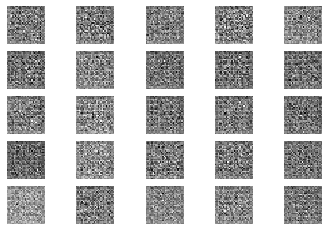

In [50]:
from numpy import zeros
from numpy.random import randn
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from matplotlib import pyplot
 
# generar puntos en el espacio latente como input para el generador
def generate_latent_points(latent_dim, n_samples):
	
	x_input = np.random.randn(latent_dim * n_samples)
	# reshape en un batch de inputs para la red
	x_input = x_input.reshape(n_samples, latent_dim)
	return x_input
 
# usar el generador para producir n ejemplos falsos con etiqueta
def generate_fake_samples(g_model, latent_dim, n_samples):
	x_input = generate_latent_points(latent_dim, n_samples)	
	X = g_model.predict(x_input)
 
	# crear etiquetas falsas
	y = np.zeros((n_samples, 1))
	return X, y
 

latent_dim = 100

model = define_generator(latent_dim)

n_samples = 25
X, _ = generate_fake_samples(model, latent_dim, n_samples)

for i in range(n_samples):
	plt.subplot(5, 5, 1 + i)
	plt.axis('off')
	plt.imshow(X[i, :, :, 0], cmap='gray_r')
plt.show()

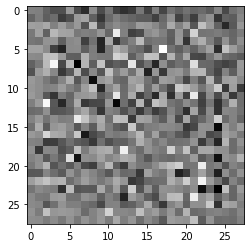

In [51]:
plt.imshow(X[0, :, :, 0], cmap='gray_r')

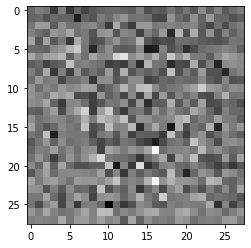

In [54]:
plt.imshow(X[24, :, :, 0], cmap='gray_r')

## Modelo combinado de Generador + Discriminador para actualizar el generador

In [58]:
def define_gan(g_model, d_model):
	# parametros del discriminador no-entrenables
	d_model.trainable = False
	model = Sequential()
 
	# generador
	model.add(g_model)
 
	# discriminador
	model.add(d_model)
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt)
	return model
 

latent_dim = 100

d_model = define_discriminator()

g_model = define_generator(latent_dim)

gan_model = define_gan(g_model, d_model)

gan_model.summary()

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_31 (Sequential)   (None, 28, 28, 1)         1164289   
_________________________________________________________________
sequential_30 (Sequential)   (None, 1)                 40705     
Total params: 1,204,994
Trainable params: 1,164,289
Non-trainable params: 40,705
_________________________________________________________________


## Entrenar la Gan

In [0]:
def train_gan(gan_model, latent_dim, n_epochs=100, n_batch=256):
	# manually enumerate epochs
	for i in range(n_epochs):
		# prepare points in latent space as input for the generator
		x_gan = generate_latent_points(latent_dim, n_batch)
		# create inverted labels for the fake samples
		y_gan = ones((n_batch, 1))
		# update the generator via the discriminator's error
		gan_model.train_on_batch(x_gan, y_gan)

## Entrenar el Generador y el Discriminador

In [63]:
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=100, n_batch=256):
	bat_per_epo = int(dataset.shape[0] / n_batch)
	half_batch = int(n_batch / 2)
	# enumerar las epochs
	for i in range(n_epochs):
		# enumerar los batches del training set
		for j in range(bat_per_epo):
			# seleccionar ejemplos reales al azar
			X_real, y_real = generate_real_samples(dataset, half_batch)
			
      # generar ejemplos falsos
			X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
			
			X, y = np.vstack((X_real, X_fake)), np.vstack((y_real, y_fake))
   
			# actualizar los pesos del discriminador
			d_loss= d_model.train_on_batch(X, y)[0]
   
			# puntos en el espacio lanente como inputs para el generador
			X_gan = generate_latent_points(latent_dim, n_batch)
   
			# crear etiquetas invertidas para los ejemplos falsos
			y_gan = np.ones((n_batch, 1))
   
			# actualizar el generador con el error del discriminador
			g_loss = gan_model.train_on_batch(X_gan, y_gan)
   
			# sumario de párdida
			print('>%d, %d/%d, d=%.3f, g=%.3f' % (i+1, j+1, bat_per_epo, d_loss, g_loss))
   
train(g_model, d_model, gan_model, dataset, latent_dim)

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


>1, 1/234, d=0.704, g=0.695
>1, 2/234, d=0.666, g=0.724
>1, 3/234, d=0.627, g=0.749


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Streaming output truncated to the last 5000 lines.
>79, 150/234, d=0.000, g=16.114
>79, 151/234, d=0.000, g=16.117
>79, 152/234, d=0.000, g=16.115
>79, 153/234, d=0.000, g=16.116
>79, 154/234, d=0.000, g=16.116
>79, 155/234, d=0.000, g=16.117
>79, 156/234, d=0.000, g=16.118
>79, 157/234, d=0.000, g=16.118
>79, 158/234, d=0.000, g=16.112
>79, 159/234, d=0.000, g=16.112
>79, 160/234, d=0.000, g=16.115
>79, 161/234, d=0.000, g=16.116
>79, 162/234, d=0.000, g=16.115
>79, 163/234, d=0.000, g=16.115
>79, 164/234, d=0.000, g=16.112
>79, 165/234, d=0.000, g=16.116
>79, 166/234, d=0.000, g=16.117
>79, 167/234, d=0.000, g=16.117
>79, 168/234, d=0.000, g=16.117
>79, 169/234, d=0.000, g=16.115
>79, 170/234, d=0.000, g=16.117
>79, 171/234, d=0.000, g=16.114
>79, 172/234, d=0.000, g=16.116
>79, 173/234, d=0.000, g=16.116
>79, 174/234, d=0.000, g=16.116
>79, 175/234, d=0.000, g=16.115
>79, 176/234, d=0.000, g=16.115
>79, 177/234, d=0.000, g=16.113
>79, 178/234, d=0.000, g=16.116
>79, 179/234, d=0.000

## Generacion de Imagenes con la Gan

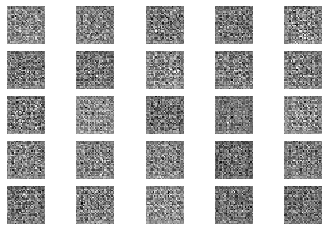

In [72]:
from keras.models import load_model
from numpy.random import randn
from matplotlib import pyplot
 

def generate_latent_points(latent_dim, n_samples):	
	x_input = np.random.randn(latent_dim * n_samples)	
	x_input = x_input.reshape(n_samples, latent_dim)
	return x_input
 
# crear y guardar las imagenes generadas
def save_plot(examples, n):
	for i in range(n * n):
		plt.subplot(n, n, 1 + i)
		plt.axis('off')
		plt.imshow(examples[i, :, :, 0], cmap='gray_r')
	plt.show()
 

#model = load_model('generator_model_100.h5')
# generar imagenes
latent_points = generate_latent_points(100, 25)
X = model.predict(latent_points)

# graficos
save_plot(X, 5)

## Ejemplo de una imagen generada por un punto especifico en el espacio latente

In [0]:
from keras.models import load_model
from numpy import asarray
from matplotlib import pyplot

#model = load_model('generator_model_100.h5')
# puros 0s
vector = asarray([[0.0 for _ in range(100)]])
# generar imagen
X = model.predict(vector)

pyplot.imshow(X[0, :, :, 0], cmap='gray_r')
pyplot.show()